In [1]:
import savReaderWriter as s
import pandas as pd
import numpy as np
import km
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#read 2016 - 2014 SPSS files
dfList=[]
fileList = ['APEAL data\\16_US_APEAL_SPSS.sav'] #,'APEAL data\\15_US_APEAL_SPSS.sav','APEAL data\\14_US_APEAL_SPSS.sav']
for f in fileList:
#load data from SPSS into dataframe
    SPSSFile = s.SavReader(f, returnHeader=True, ioUtf8=True, verbose=True, idVar='ID')
    df = pd.DataFrame(list(SPSSFile))
    SPSSFile.close()
    df.columns = df.iloc[0]
    df = df.reindex(df.index.drop(0))
    dropList=['ID', 'WT']
    df = df.drop(dropList, axis=1)
    df=df.replace(99,np.nan)
    if 'Make_Series' not in list(df.columns):
        df=df.rename(columns = {'MakeSeries':'Make_Series'})
    
    if 'Demo_Height' not in list(df.columns):
        df=df.rename(columns = {'Demo_Height_Inch':'Demo_Height'})
    dfList.append(df)

In [3]:
#read 2013 APEAL file
#temp = pd.read_csv('APEAL data\\13_US_APEAL_SPSS.csv')
#df=df.rename(columns = {'MakeSeries':'Make_Series'})
#dropList=['Sequence_Number', 'WT']
#temp = temp.drop(dropList, axis=1)
#dfList.append(temp)

In [4]:
#prune dataframes
df1List=[]
colList=['Make','Make_Series','Segment','Demo_Census_9','DEMO_INCM_1','Demo_AgeBucket','DEMO_GNDR_1','Demo_Height','APEAL_Index','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
for i,df in enumerate(dfList):
    print(i)
    df1List.append(df[colList])

0


In [5]:
#convert cols to numeric
#not needed when using multinomial distribution
#df2List=[]
#for df in df1List:
#    for c in df.columns:
#        if df[c].apply(np.isreal).all(axis=0):
#            df[c] = pd.to_numeric(df[c], errors='coerce')
#    df2List.append(df)

In [6]:
#normalize numeric data
#not needed when using multinomial analysis
#df3List=[]
#for df in df2List:
#    numCols = df.select_dtypes(include=[np.number]).columns
#    df[numCols] = (df[numCols]-df[numCols].mean())/df[numCols].std()
#    df3List.append(df)

In [7]:
varList=['VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']

In [8]:
demoList=['Make','Make_Series','Make_Premium_Non_Premium','Segment','DEMO_INCM_1','Demo_AgeBucket','DEMO_GNDR_1']
l=demoList+varList
var='VFUEL_R_1'
df=dfList[0][l]

In [9]:
p=['DEMO_INCM_1','Demo_AgeBucket','DEMO_GNDR_1']
for i in p:
    df[i] = df[i].astype('category')

D:\WinPython\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006F3A6940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002C586320>]], dtype=object)

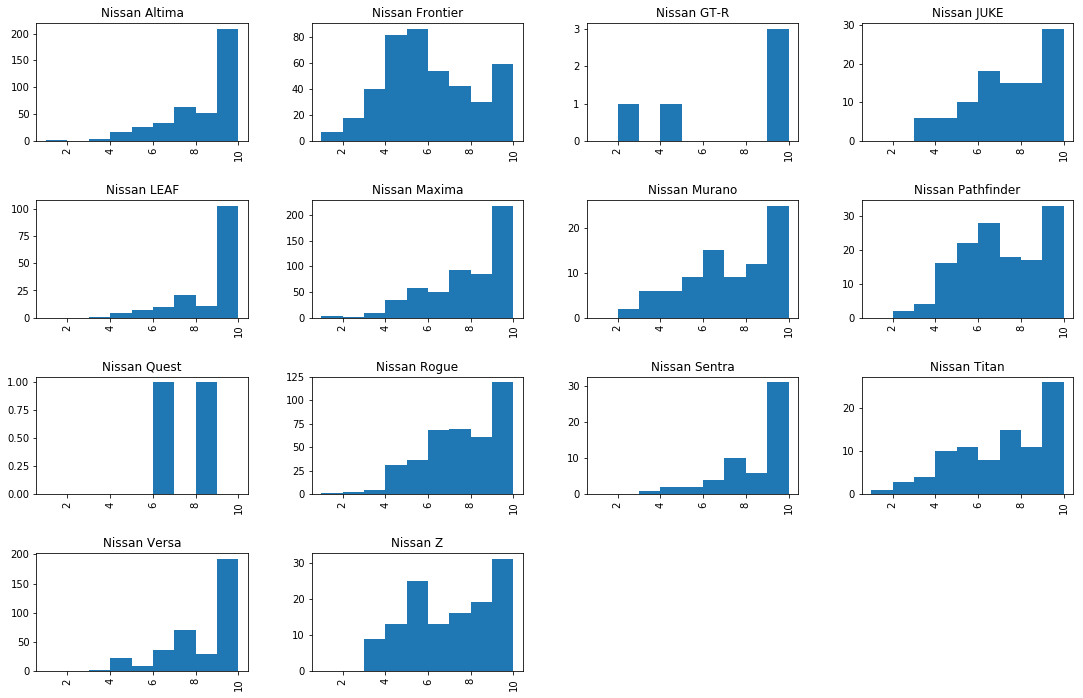

In [10]:
subFrameVars = ['Make','Make_Series',var]
df[df['Make']=='Nissan'][subFrameVars].hist(by='Make_Series', bins=range(1,11), figsize=(18, 12))

D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 23 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 55 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006B20DBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000291E8278>]], dtype=object)

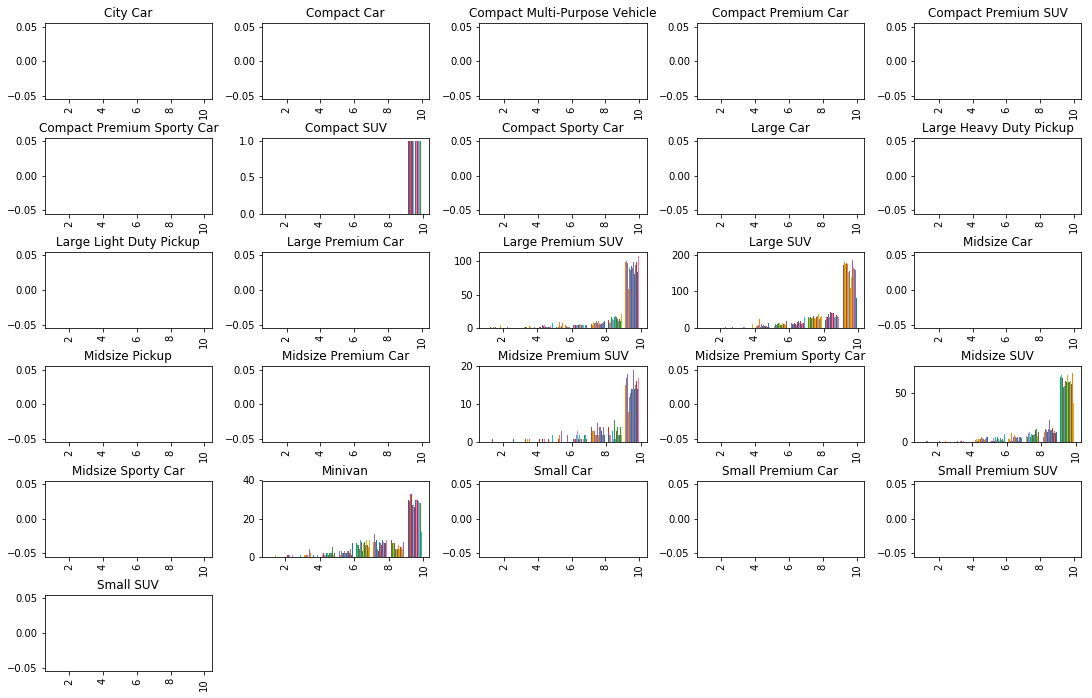

In [11]:
df.hist(by='Segment', bins=range(1,11), figsize=(18, 12))

D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 12 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 17 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 61 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 15 x 91)
  '(shape is %d x %d)' % inp.shape[::-1])
D:\WinPython\python-3.5.3.amd64\lib\site-packages\matplotlib\axes\_axes.py:6087: UserWarning: 2D his

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000045CED898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003C8E4668>]], dtype=object)

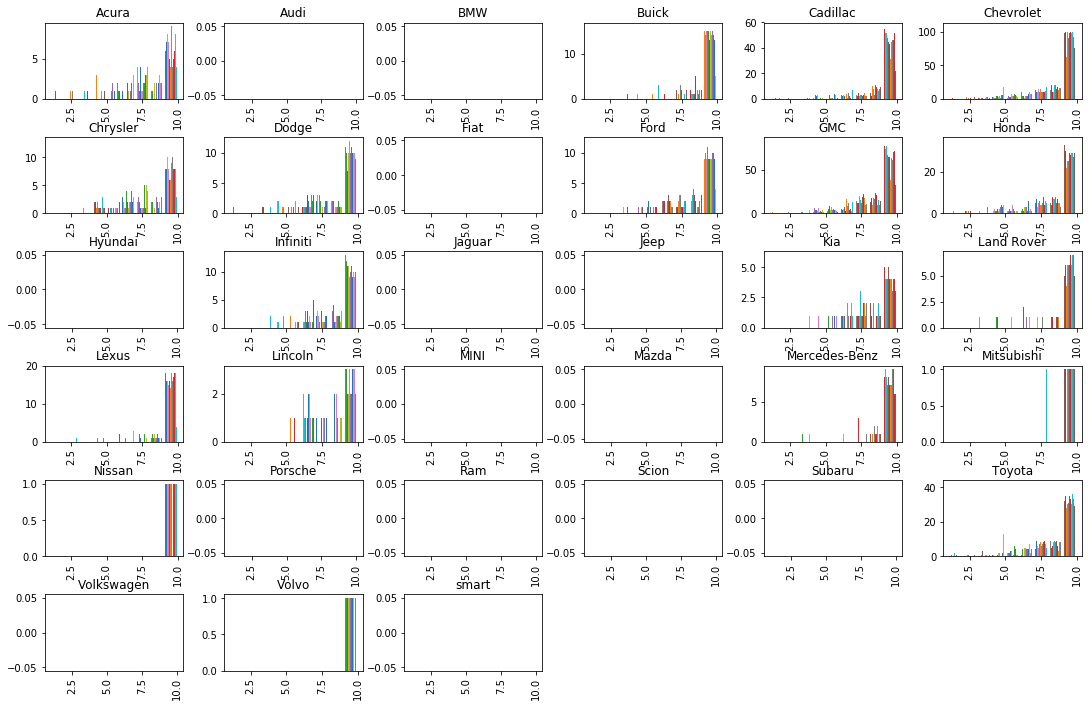

In [12]:
df.hist(by='Make', bins=range(1,11), figsize=(18, 12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000044F02390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D0D7B8>], dtype=object)

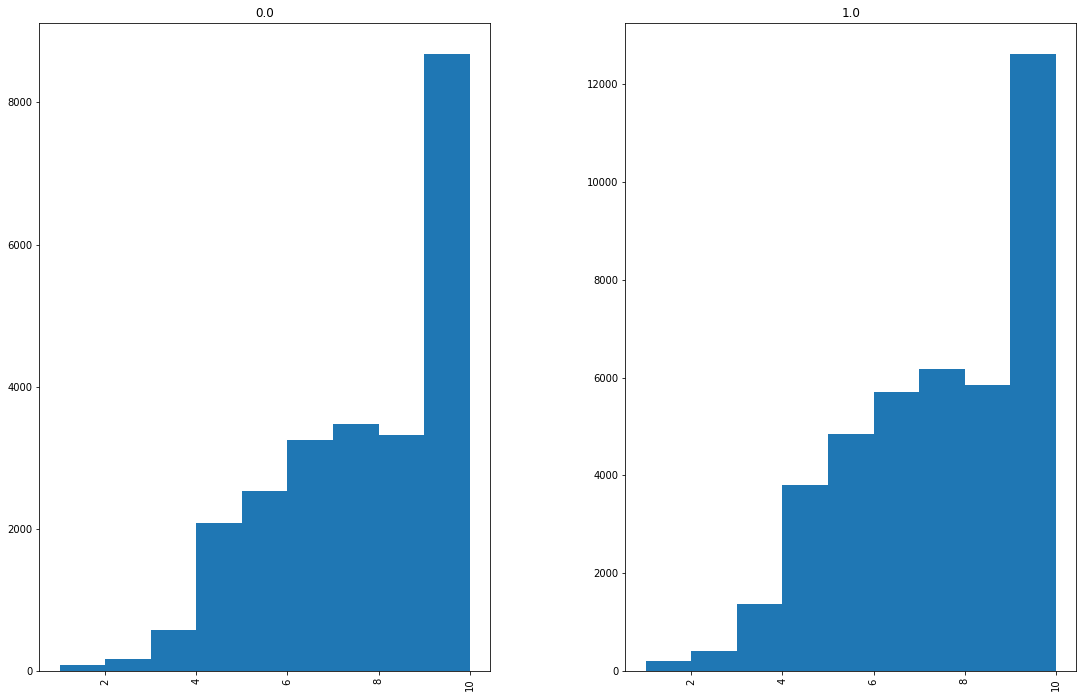

In [13]:
m=['DEMO_GNDR_1','VFUEL_R_1']
df[m].hist(by='DEMO_GNDR_1', bins=range(1,11), figsize=(18, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003657A898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000FAA20B8>]], dtype=object)

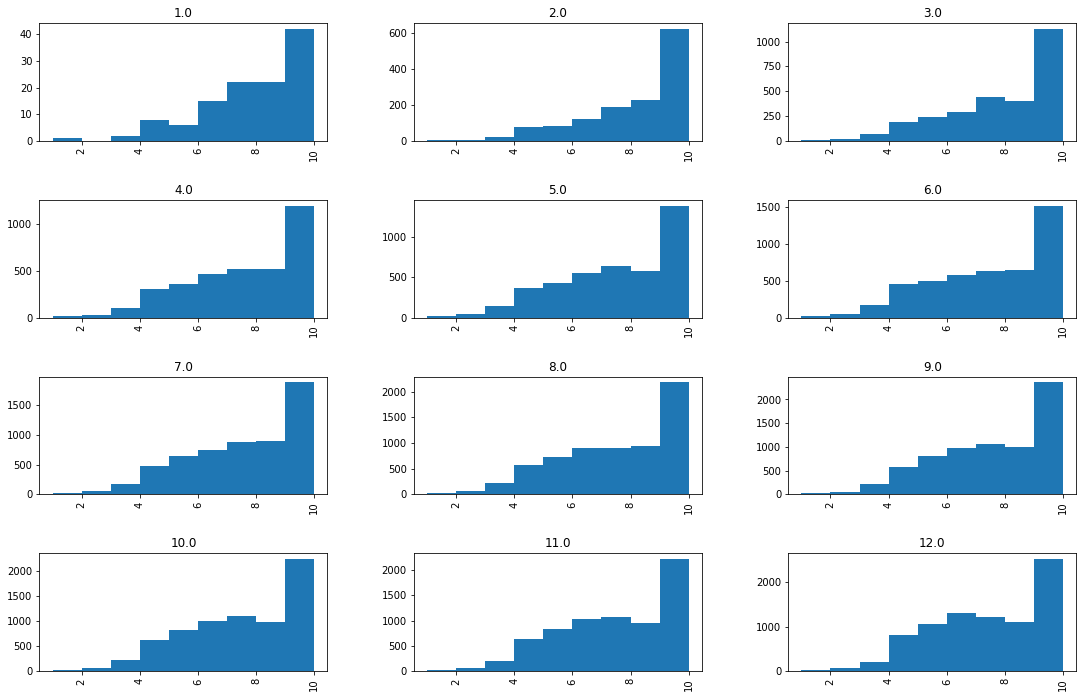

In [14]:
m=['Demo_AgeBucket','VFUEL_R_1']
df[m].hist(by='Demo_AgeBucket', bins=range(1,11), figsize=(18, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006A60DB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000006EAE67B8>]], dtype=object)

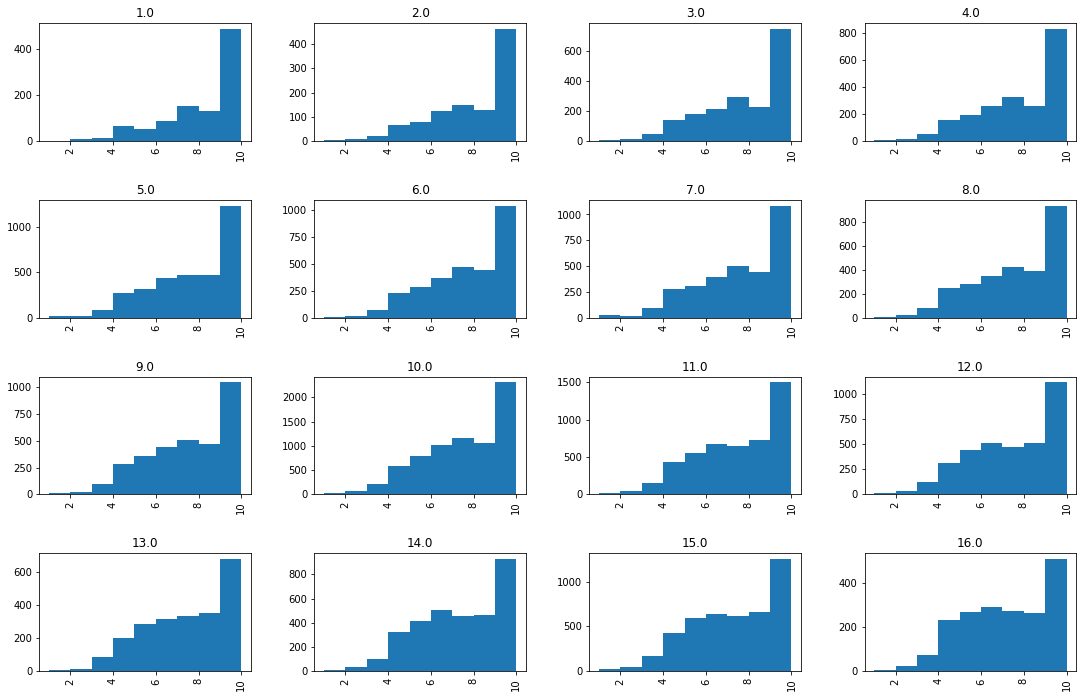

In [15]:
m=['DEMO_INCM_1','VFUEL_R_1']
df[m].hist(by='DEMO_INCM_1', bins=range(1,11), figsize=(18, 12))

In [16]:
df=dfList[0]
var = 'VFUEL_R_1'
l=['Make','Make_Series','Make_Premium_Non_Premium',var]
df=df[l].dropna()
probDist = [df[var].value_counts()/len(df)]
temp = df[df['Make_Premium_Non_Premium']=='Premium']
probDist.append(temp[var].value_counts()/len(temp))
temp = df[df['Make_Premium_Non_Premium']=='Non-Premium']
probDist.append(temp[var].value_counts()/len(temp))
label=['full','Premium','NonPremium']
df=df[df['Make']=='Nissan']

In [17]:
#pFull = df[var].dropna().value_counts()/len(df.dropna())
for i in df['Make_Series'].dropna().unique():
    temp = df[df['Make_Series']==i]
    if len(temp) > 30:
        print(len(temp))
        label.append(i)
        c = len(temp)
        probDist.append(temp[var].value_counts()/c)        

417
551
395
363
126
405
157
99
140
84
56
89


In [18]:
v = pd.concat(probDist, axis=1).fillna(0)
v.columns = label
v

,full,Premium,NonPremium,Nissan Frontier,Nissan Maxima,Nissan Rogue,Nissan Versa,Nissan Z,Nissan Altima,Nissan LEAF,Nissan JUKE,Nissan Pathfinder,Nissan Murano,Nissan Sentra,Nissan Titan
1.0,0.004394,0.004823,0.004208,0.016787,0.005445,0.005063,0.000000,0.000000,0.002469,0.000000,0.000000,0.000000,0.000000,0.000000,0.011236
2.0,0.008803,0.008213,0.009060,0.043165,0.003630,0.007595,0.002755,0.000000,0.000000,0.000000,0.000000,0.014286,0.023810,0.000000,0.033708
3.0,0.030067,0.030750,0.029770,0.095923,0.016334,0.012658,0.005510,0.071429,0.009877,0.006369,0.060606,0.028571,0.071429,0.017857,0.044944
4.0,0.090707,0.097980,0.087549,0.194245,0.063521,0.078481,0.060606,0.103175,0.039506,0.025478,0.060606,0.114286,0.071429,0.035714,0.112360
5.0,0.113763,0.126438,0.108259,0.206235,0.105263,0.093671,0.024793,0.198413,0.064198,0.044586,0.101010,0.157143,0.107143,0.035714,0.123596
6.0,0.137918,0.148307,0.133407,0.129496,0.090744,0.172152,0.101928,0.103175,0.083951,0.063694,0.181818,0.200000,0.178571,0.071429,0.089888
7.0,0.147921,0.138089,0.152189,0.100719,0.166969,0.174684,0.195592,0.126984,0.155556,0.133758,0.151515,0.128571,0.107143,0.178571,0.168539
8.0,0.140115,0.147114,0.137076,0.071942,0.152450,0.154430,0.079890,0.150794,0.128395,0.070064,0.151515,0.121429,0.142857,0.107143,0.123596
9.0,0.137007,0.131022,0.139605,0.071942,0.165154,0.144304,0.143251,0.142857,0.185185,0.133758,0.111111,0.100000,0.178571,0.160714,0.112360
10.0,0.189306,0.167264,0.198876,0.069544,0.230490,0.156962,0.385675,0.103175,0.330864,0.522293,0.181818,0.135714,0.119048,0.392857,0.179775


In [19]:
pca = PCA(n_components = 2)
X=pca.fit_transform(v.T)

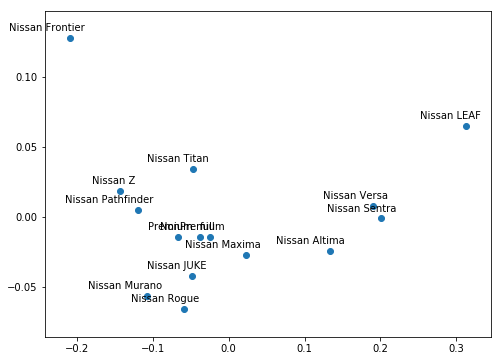

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
for l, x, y in zip(label, X[:,0], X[:,1]):
    plt.annotate(
        l,
        xy=(x, y), xytext=(15, 5),
        textcoords='offset points', ha='right', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006D970940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000006B0C6780>]], dtype=object)

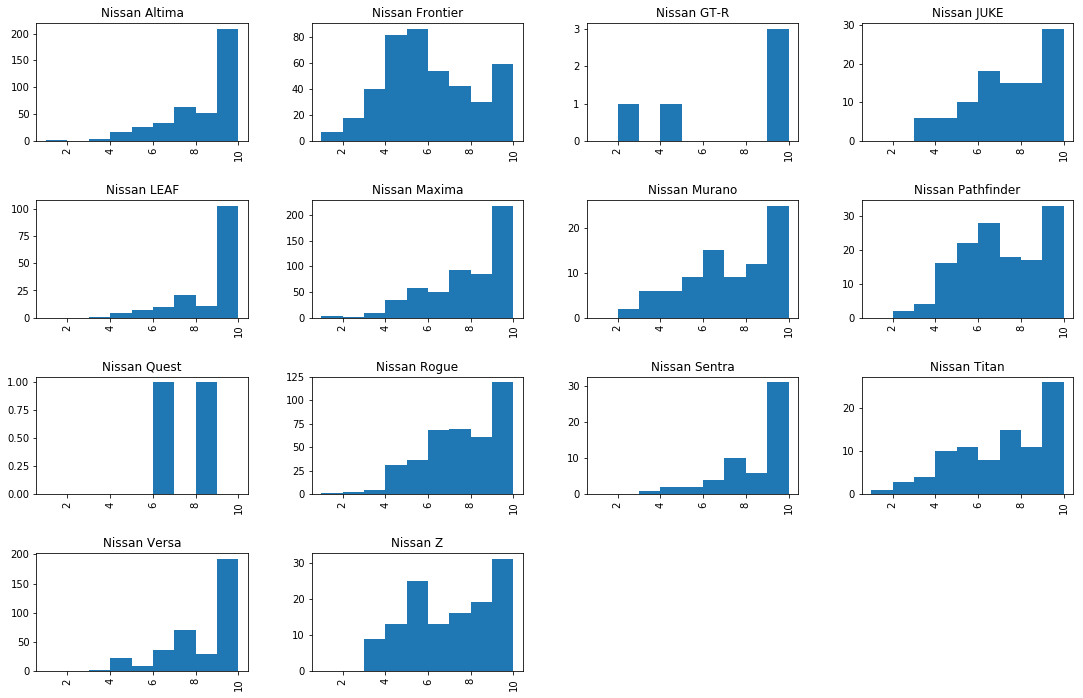

In [21]:
df[['Make_Series',var]].hist(by='Make_Series', bins=range(1,11), figsize=(18, 12))

In [22]:
var='VFUEL_R_1'
sFV = ['Make','Make_Series',var]
d=dfList[0][sFV].dropna()
d=d[d['Make']=='Nissan'].drop('Make',axis=1)
#d[var]=-1*d[var]+10
#d[var]=np.log(d[var])
#d.hist(figsize=(9, 6))
d = pd.get_dummies(d)

In [23]:
# Initialize
mapper = km.KeplerMapper(verbose=1)

In [24]:
# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

In [25]:
n=['Make_Series_Nissan GT-R','Make_Series_Nissan Quest','Make_Series_Nissan Z','Make_Series_Nissan Murano']
d = d.drop(n,axis=1)
d

,VFUEL_R_1,Make_Series_Nissan Altima,Make_Series_Nissan Frontier,Make_Series_Nissan JUKE,Make_Series_Nissan LEAF,Make_Series_Nissan Maxima,Make_Series_Nissan Pathfinder,Make_Series_Nissan Rogue,Make_Series_Nissan Sentra,Make_Series_Nissan Titan,Make_Series_Nissan Versa
409,7.0,0,1,0,0,0,0,0,0,0,0
410,5.0,0,1,0,0,0,0,0,0,0,0
411,9.0,0,1,0,0,0,0,0,0,0,0
412,6.0,0,1,0,0,0,0,0,0,0,0
414,7.0,0,0,0,0,1,0,0,0,0,0
415,9.0,0,0,0,0,1,0,0,0,0,0
416,8.0,0,0,0,0,0,0,1,0,0,0
417,5.0,0,0,0,0,0,0,1,0,0,0
418,7.0,0,0,0,0,0,0,1,0,0,0
419,6.0,0,0,0,0,0,0,1,0,0,0


In [26]:
# Fit to and transform the data
#projected_data = mapper.fit_transform(d, projection=PCA()) # X-Y axis

In [27]:
# Create dictionary called 'complex' with nodes, edges and meta-information
#complex = mapper.map(projected_data, d, nr_cubes=10)

In [28]:
# Visualize it
#mapper.visualize(complex, path_html="keplermapper_output.html", 
#                 title="Mapper Test")

Distance algorithm based on probability distribution

In [29]:
df=dfList[0]
var = 'VSS_R_1'
l=['Make','Make_Series','Make_Premium_Non_Premium',var]
df = df[l].dropna()
dfs=df.applymap(str)

In [30]:
probDist={}
probDist['all']=dfs[var].value_counts()/len(dfs)
temp = dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium']
probDist['NonPremium']=temp[var].value_counts()/len(temp)
temp = dfs[dfs['Make_Premium_Non_Premium']=='Premium']
probDist['Premium']=temp[var].value_counts()/len(temp)
for m in dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium']['Make_Series'].unique():
    temp = dfs[dfs['Make_Series']==m]
    if temp['Make_Series'].count() >= 50:
        probDist[m]=temp[var].value_counts()/len(temp)

In [31]:
list(probDist['Chrysler 300'].index)

['10.0', '9.0', '8.0', '7.0', '6.0', '4.0', '5.0', '3.0', '2.0']

In [32]:
s = pd.Series([1], index=['10.0'])
-1*np.log(np.sqrt(probDist['Chrysler 300'].multiply(s).fillna(0)).sum())

0.55791220877461556

In [33]:
from itertools import combinations
makeList=list(probDist.keys())
c=[]
for s in combinations(makeList,2):
    c.append(s)

In [34]:
seriesCombos=[]
for m1, m2 in c:
    s=0
    #print(m1, m2, np.sqrt(probDist[m1].multiply(probDist[m2])).fillna(0).sum())
    h=np.sqrt(probDist[m1].multiply(probDist[m2]).fillna(0)).sum()
    if h==0:
        print (m1, m2)
    s=-1*np.log(h)
    seriesCombos.append([m1, m2, s])

In [35]:
mC=pd.DataFrame(seriesCombos,columns=['make1','make2','distance'])

In [36]:
mC.describe()

,distance
count,9730.000000
mean,0.027874
std,0.029736
min,0.000259
25%,0.010031
50%,0.017890
75%,0.033774
max,0.320593


In [37]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
Z = linkage(mC['distance'], 'ward')

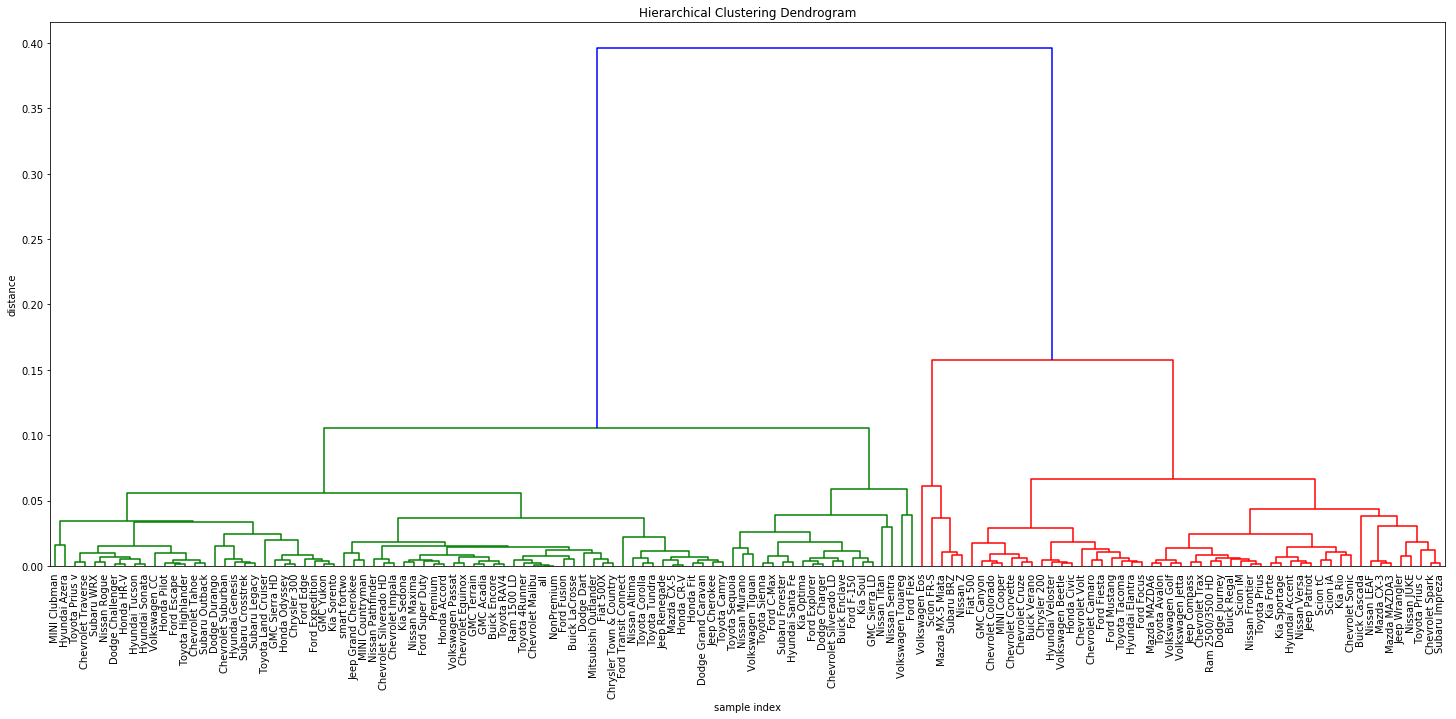

In [39]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    labels=makeList,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000069BDDE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000066A7D1D0>]], dtype=object)

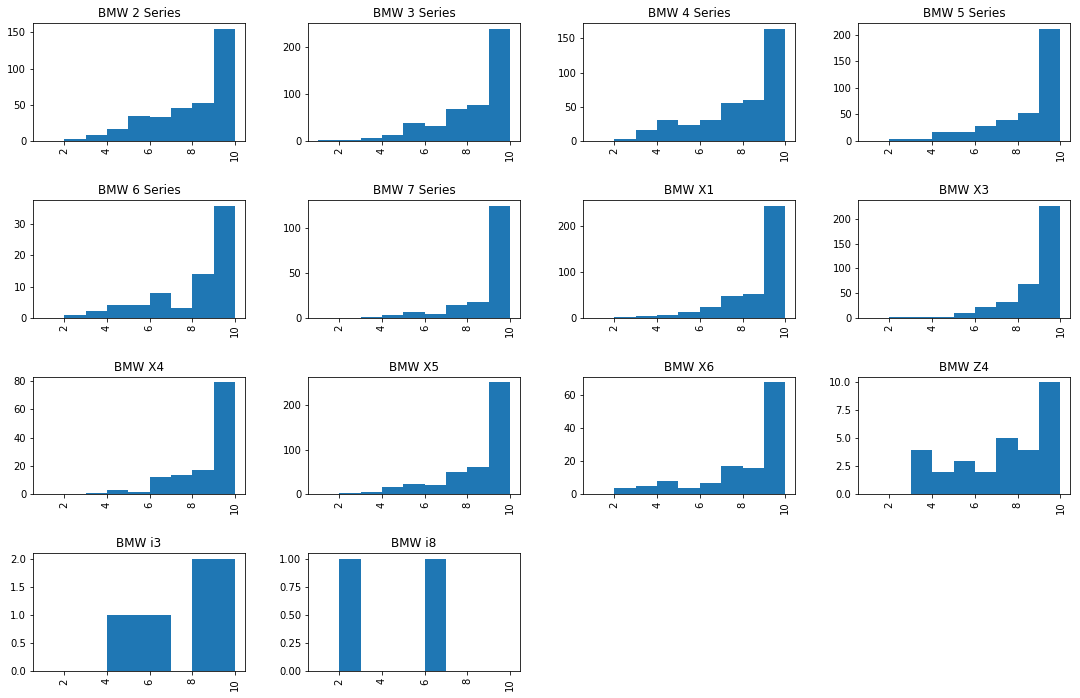

In [40]:
df[df['Make']=='BMW'].hist(by='Make_Series', bins=range(1,11), figsize=(18, 12))

Graphing probability distribution distance vs average value for models

In [41]:
df=dfList[0]
var = 'VFUEL_R_3'
l=['Make','Make_Series','Make_Premium_Non_Premium','DEMO_INCM_1',var]
df = df[l].dropna()
dfs=df.applymap(str)

In [42]:
probDist={}
probDist['all']=dfs[var].value_counts()/len(dfs[var])
avgProbDist=dfs[var].value_counts()/len(dfs)
temp = dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium']
probDist['NonPremium']=temp[var].value_counts()/len(temp)
avgProbDist=temp[var].value_counts()/len(temp)
temp = dfs[dfs['Make_Premium_Non_Premium']=='Premium']
probDist['Premium']=temp[var].value_counts()/len(temp)
for m in dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium']['Make_Series'].unique():
    temp = dfs[dfs['Make_Series']==m]
    if temp['Make_Series'].count() >= 50:
        probDist[m]=temp[var].value_counts()/len(temp)

In [43]:
tsdf=pd.DataFrame.from_dict(probDist).fillna(0).T
tsdf

,1.0,10.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Buick Cascada,0.000000,0.136364,0.011364,0.034091,0.068182,0.102273,0.193182,0.125000,0.181818,0.147727
Buick Enclave,0.003497,0.111888,0.020979,0.031469,0.150350,0.153846,0.153846,0.143357,0.108392,0.122378
Buick Encore,0.000000,0.182510,0.000000,0.019011,0.034221,0.110266,0.129278,0.178707,0.144487,0.201521
Buick LaCrosse,0.000000,0.157534,0.003425,0.017123,0.106164,0.178082,0.157534,0.116438,0.143836,0.119863
Buick Regal,0.003597,0.147482,0.010791,0.021583,0.093525,0.118705,0.136691,0.187050,0.151079,0.129496
Buick Verano,0.000000,0.187500,0.003676,0.014706,0.102941,0.128676,0.110294,0.139706,0.165441,0.147059
Chevrolet Camaro,0.000000,0.214900,0.002865,0.014327,0.071633,0.091691,0.114613,0.157593,0.171920,0.160458
Chevrolet Colorado,0.000000,0.167857,0.003571,0.017857,0.060714,0.107143,0.128571,0.217857,0.153571,0.142857
Chevrolet Corvette,0.000000,0.291803,0.003279,0.026230,0.049180,0.095082,0.127869,0.160656,0.114754,0.131148
Chevrolet Cruze,0.006098,0.234756,0.009146,0.015244,0.042683,0.091463,0.088415,0.170732,0.143293,0.198171


In [44]:
avgProbDistMatrix = pd.concat([pd.DataFrame(avgProbDist).T]*135, ignore_index=True)
avgProbDistMatrix=avgProbDistMatrix[['1.0','10.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0']]
avgProbDistMatrix.index=tsdf.index
#avgProbDistMatrix
#tsdf.multiply(avgProbDistMatrix)

In [45]:
tsdf['dist'] = np.log((np.sqrt(tsdf*avgProbDistMatrix)).sum(axis=1))*-1

In [46]:
tsdf['avg']=np.dot(np.array(tsdf.T[:-1].index).astype(float),tsdf.T[:-1])

In [47]:
tsdf

,1.0,10.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,dist,avg
Buick Cascada,0.000000,0.136364,0.011364,0.034091,0.068182,0.102273,0.193182,0.125000,0.181818,0.147727,0.011404,7.090909
Buick Enclave,0.003497,0.111888,0.020979,0.031469,0.150350,0.153846,0.153846,0.143357,0.108392,0.122378,0.021885,6.524476
Buick Encore,0.000000,0.182510,0.000000,0.019011,0.034221,0.110266,0.129278,0.178707,0.144487,0.201521,0.012595,7.566540
Buick LaCrosse,0.000000,0.157534,0.003425,0.017123,0.106164,0.178082,0.157534,0.116438,0.143836,0.119863,0.014031,6.938356
Buick Regal,0.003597,0.147482,0.010791,0.021583,0.093525,0.118705,0.136691,0.187050,0.151079,0.129496,0.005340,7.035971
Buick Verano,0.000000,0.187500,0.003676,0.014706,0.102941,0.128676,0.110294,0.139706,0.165441,0.147059,0.005619,7.268382
Chevrolet Camaro,0.000000,0.214900,0.002865,0.014327,0.071633,0.091691,0.114613,0.157593,0.171920,0.160458,0.003713,7.553009
Chevrolet Colorado,0.000000,0.167857,0.003571,0.017857,0.060714,0.107143,0.128571,0.217857,0.153571,0.142857,0.006977,7.328571
Chevrolet Corvette,0.000000,0.291803,0.003279,0.026230,0.049180,0.095082,0.127869,0.160656,0.114754,0.131148,0.008205,7.665574
Chevrolet Cruze,0.006098,0.234756,0.009146,0.015244,0.042683,0.091463,0.088415,0.170732,0.143293,0.198171,0.007091,7.701220


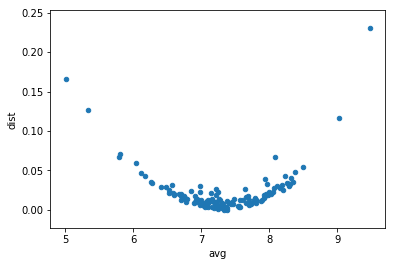

In [48]:
tsdf.plot(kind='scatter',x='avg',y='dist')

In [49]:
avg=np.dot(avgProbDist,np.array(avgProbDist.index).astype(float))
tsdf['avg']=tsdf['avg']-avg

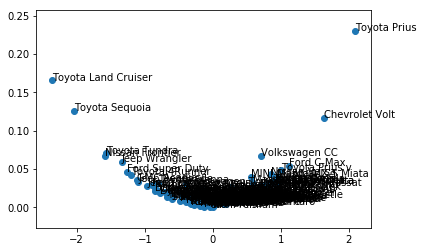

In [50]:
fig, ax = plt.subplots()
ax.scatter(tsdf['avg'],tsdf['dist'])
for i, txt in enumerate(list(tsdf.index)):
    ax.annotate(txt, (tsdf['avg'][i],tsdf['dist'][i]))

Calculate distance for each variable by averaging all variables

In [51]:
df=dfList[0]
varList=['Make','Make_Series','Segment','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
dfs=df[varList].applymap(str)

In [52]:
probDist={}
temp=dfs.iloc[:,1:].apply(pd.value_counts).drop('nan')
probDist['all']=temp/temp.sum().T
usedVehicleList = []
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['NonPremium']=temp.value_counts()/temp.sum()
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['Premium']=temp.value_counts()/temp.sum()
for m in dfs['Make_Series'].unique():
    temp = dfs[dfs['Make_Series']==m].iloc[:,3:].apply(pd.value_counts)
    if 'nan' in list(temp.index):
        temp=temp.drop('nan')
    if temp.sum().max() >= 50:
        for a in list(temp.columns):
            if temp[a].sum() < 50:
                temp = temp.drop(a, axis=1)
        probDist[m]=(temp/temp.sum()).fillna(0)
        usedVehicleList.append(m)
    else:
        print(m)
        
for m in dfs['Segment'].unique():
    temp = dfs[dfs['Segment']==m].iloc[:,3:].apply(pd.value_counts)
    if 'nan' in list(temp.index):
        temp=temp.drop('nan')
    if temp.sum().max() >= 50:
        for a in list(temp.columns):
            if temp[a].sum() < 50:
                temp = temp.drop(a, axis=1)
        probDist[m]=(temp/temp.sum()).fillna(0)
    else:
        print(m)

Audi allroad
BMW Z4
Cadillac ELR
Honda CR-Z
Hyundai Equus
Kia Cadenza
Mercedes-Benz G-Class
Mercedes-Benz SL-Class
MINI Paceman
Mercedes-Benz Metris
Mercedes-Benz AMG GT
Mitsubishi i-MiEV
Nissan GT-R
Toyota Mirai
Volvo S80
Dodge Viper
Ram ProMaster City
Ford Taurus
Hyundai Genesis Coupe
Mercedes-Benz B-Class
Jaguar XJ
BMW i8
Mitsubishi Lancer
Infiniti Q70
Kia K900
Lincoln MKS
Infiniti QX60
Lincoln MKT
Toyota Yaris
BMW i3
Chevrolet SS
Fiat 500L
Nissan Quest


In [53]:
vList=list(probDist.keys())
nRows=len(vList)
distanceMatrix = pd.DataFrame(np.zeros((nRows, nRows)),index=vList, columns=vList)

In [54]:
#calculate distance matrix
from itertools import combinations
ks=list(probDist.keys())
for k1, k2 in combinations(ks, 2):
#k1='Toyota Camry'
#k2='Nissan Altima'
    t=np.sqrt(probDist[k1]*probDist[k2]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    d=np.sqrt(np.dot(d,d))
    distanceMatrix.loc[k1,k2]=d
    distanceMatrix.loc[k2,k1]=d

In [55]:
vardist = []
for k in vList:
    t=np.sqrt(probDist[k]*probDist['all']).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    vardist.append(d)

In [56]:
varListdf=pd.DataFrame(vardist).fillna(0).drop(['Make_Series','Segment'],axis=1)
varListdf.index = vList

In [57]:
distFromAvg = pd.DataFrame(distanceMatrix['all'])
distFromAvg.columns=['distance']

In [58]:
distanceMatrix

,Cadillac ATS,Volkswagen CC,Kia Soul,BMW 5 Series,Porsche Macan,Lexus IS,Large Heavy Duty Pickup,Subaru Crosstrek,Jeep Grand Cherokee,BMW X4,...,Jaguar F-Type,Nissan Pathfinder,Fiat 500,Infiniti QX70,Nissan LEAF,Subaru Impreza,Chevrolet Camaro,MINI Clubman,Mercedes-Benz GL-Class,Hyundai Genesis
Cadillac ATS,0.000000,0.480513,0.231098,0.198695,0.308629,0.165414,0.195133,0.225194,0.200332,0.265372,...,0.332849,0.267217,0.798023,0.363375,0.567046,0.299901,0.278271,0.321200,0.357886,0.326629
Volkswagen CC,0.480513,0.000000,0.472861,0.292883,0.382956,0.335667,0.470847,0.509977,0.342482,0.316666,...,0.638986,0.480286,1.734121,0.581216,1.170370,0.770420,0.759508,0.307582,0.302605,0.309552
Kia Soul,0.231098,0.472861,0.000000,0.286423,0.537463,0.211637,0.137516,0.158831,0.143712,0.327523,...,0.601166,0.167566,1.059153,0.477438,0.519783,0.196966,0.676828,0.358779,0.340882,0.249939
BMW 5 Series,0.198695,0.292883,0.286423,0.000000,0.113192,0.100905,0.196942,0.333499,0.221330,0.137107,...,0.335539,0.285150,1.379359,0.286190,0.899098,0.546319,0.419569,0.185782,0.120701,0.153785
Porsche Macan,0.308629,0.382956,0.537463,0.113192,0.000000,0.192640,0.364298,0.575135,0.409367,0.155190,...,0.316990,0.488049,1.584741,0.295722,1.199868,0.858082,0.395549,0.250293,0.183420,0.273803
Lexus IS,0.165414,0.335667,0.211637,0.100905,0.192640,0.000000,0.148279,0.253018,0.178142,0.174419,...,0.322153,0.225901,1.268179,0.279410,0.851312,0.456109,0.462769,0.208367,0.187836,0.162824
Large Heavy Duty Pickup,0.195133,0.470847,0.137516,0.196942,0.364298,0.148279,0.000000,0.182660,0.137964,0.244922,...,0.436731,0.135882,1.008446,0.383300,0.537714,0.255985,0.515755,0.318617,0.274367,0.178201
Subaru Crosstrek,0.225194,0.509977,0.158831,0.333499,0.575135,0.253018,0.182660,0.000000,0.182640,0.362201,...,0.634201,0.177657,0.858767,0.517555,0.437367,0.178477,0.712434,0.393848,0.403222,0.266233
Jeep Grand Cherokee,0.200332,0.342482,0.143712,0.221330,0.409367,0.178142,0.137964,0.182640,0.000000,0.233727,...,0.563666,0.158698,1.103852,0.433230,0.581290,0.314775,0.623454,0.285839,0.256325,0.164886
BMW X4,0.265372,0.316666,0.327523,0.137107,0.155190,0.174419,0.244922,0.362201,0.233727,0.000000,...,0.400037,0.320083,1.418813,0.313032,0.975525,0.605339,0.516782,0.204694,0.192393,0.193244


In [59]:
vehdf=df['APEAL_Index'].dropna()
distFromAvg.loc['all','average'] = vehdf.sum()/vehdf.count()
for k in df['Make_Series'].unique():
    vehdf=df[df['Make_Series']==k]['APEAL_Index'].dropna()
    distFromAvg.loc[k,'average'] = vehdf.sum()/vehdf.count()
for k in df['Segment'].unique():
    vehdf=df[df['Segment']==k]['APEAL_Index'].dropna()
    distFromAvg.loc[k,'average'] = vehdf.sum()/vehdf.count()

In [60]:
distFromAvg.loc['Compact Car']

distance      0.042987
average     791.087373
Name: Compact Car, dtype: float64

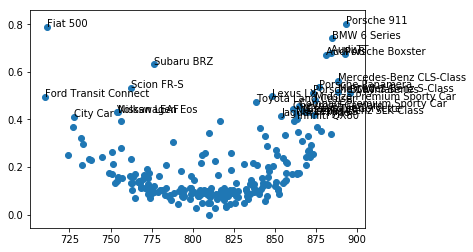

In [61]:
fig, ax = plt.subplots()
ax.scatter(distFromAvg['average'],distFromAvg['distance'])
for i, txt in enumerate(list(distFromAvg.index)):
    if distFromAvg['distance'][i]>.4:
        ax.annotate(txt, (distFromAvg['average'][i],distFromAvg['distance'][i]))

In [62]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Toyota Camry'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['average'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).fillna(0)
tempdf.sort_values(by=tempdf.columns[1], ascending=False).head()

,average,Toyota Camry
VSS_R_7,8.368421,0.024306
VAEN_R_14,8.023622,0.020190
VAEN_R_9,7.752212,0.020147
VAEN_R_10,8.103448,0.019088
VSS_R_3,7.963173,0.017695


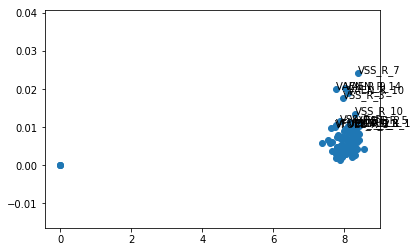

In [63]:
fig, ax = plt.subplots()
ax.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.01:
        ax.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

In [64]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Scion FR-S'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['average'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).fillna(0)
tempdf.sort_values(by=tempdf.columns[1], ascending=False).head()

,average,Scion FR-S
VSS_R_3,3.477876,0.372826
VSEAT_R_6,4.200000,0.281161
VSS_R_5,5.560345,0.088875
VSS_R_1,6.338843,0.079117
VSS_R_12,6.619835,0.068213


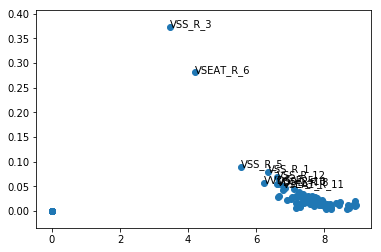

In [65]:
fig, ax = plt.subplots()
ax.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.05:
        ax.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

Calculate above cell with segment average instead of overall average

In [66]:
distFromSegment = pd.DataFrame(np.zeros((len(usedVehicleList), 3)), columns=['Segment','APEAL Score','Distance'],index=usedVehicleList)

In [67]:
#vehdf=df['APEAL_Index'].dropna()
#distFromAvg.loc['all','average'] = vehdf.sum()/vehdf.count()
for k in usedVehicleList:
    vehdf=df[df['Make_Series']==k]['APEAL_Index'].dropna()
    distFromSegment.loc[k,'APEAL Score'] = vehdf.sum()/vehdf.count()
    currentSegment = df[df['Make_Series']==k]['Segment'].iloc[0]
    distFromSegment.loc[k,'Segment'] = currentSegment
    distFromSegment.loc[k,'Distance'] = distanceMatrix.loc[k,currentSegment]

In [68]:
distFromSegment

,Segment,APEAL Score,Distance
Cadillac CTS,Midsize Premium Car,837.347172,0.059778
Cadillac Escalade,Large Premium SUV,871.040501,0.046305
Cadillac SRX,Midsize Premium SUV,819.074107,0.067131
Cadillac XTS,Midsize Premium Car,832.830334,0.058099
Chevrolet Suburban,Large SUV,813.838348,0.043038
Chevrolet Colorado,Midsize Pickup,786.103198,0.059228
Chevrolet Corvette,Midsize Premium Sporty Car,869.514570,0.036570
Chevrolet Cruze,Compact Car,754.305661,0.082870
Chevrolet Equinox,Compact SUV,768.238649,0.038852
Chevrolet Malibu,Midsize Car,809.020858,0.040579


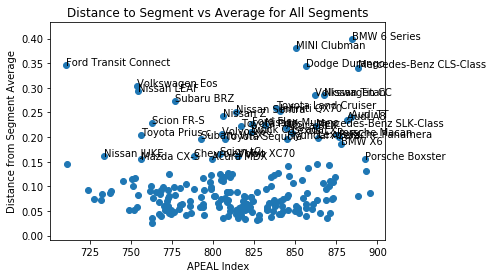

In [69]:
plt.scatter(distFromSegment['APEAL Score'],distFromSegment['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance to Segment vs Average for All Segments')
for txt in list(distFromSegment.index):
    if distFromSegment.loc[txt,'Distance']>.15:
        plt.annotate(txt, (distFromSegment.loc[txt,'APEAL Score'],distFromSegment.loc[txt,'Distance']))

In [70]:
#Export array to excel
#writer = pd.ExcelWriter('D:\LocalData\peterk2\Desktop\Distance Summary\All distance to Segment.xlsx')
#distFromSegment.to_excel(writer,'Sheet1')
#writer.save()

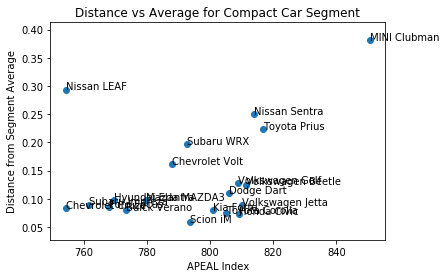

In [71]:
tempSegment = 'Compact Car'
singelSegDistance = distFromSegment[distFromSegment['Segment']==tempSegment]
#fig, ax = plt.subplots()
plt.scatter(singelSegDistance['APEAL Score'],singelSegDistance['Distance'])
plt.xlabel('APEAL Index')
plt.ylabel('Distance from Segment Average')
plt.title('Distance vs Average for Compact Car Segment')
for txt in list(singelSegDistance.index):
    if singelSegDistance.loc[txt,'Distance']>0:
        plt.annotate(txt, (singelSegDistance.loc[txt,'APEAL Score'],singelSegDistance.loc[txt,'Distance']))

In [72]:
#Export array to excel
#writer = pd.ExcelWriter('D:\LocalData\peterk2\Desktop\Distance Summary\Compact Car Data.xlsx')
#singelSegDistance.to_excel(writer,'Sheet1')
#writer.save()

In [73]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan LEAF'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
#writer = pd.ExcelWriter('D:\LocalData\peterk2\Desktop\Distance Summary\Leaf Data.xlsx')
#tempdf.sort_values(by=tempdf.columns[1], ascending=False).to_excel(writer, 'Sheet1')

In [74]:
tempdf

,APEAL Score,Nissan LEAF
VAEN_R_1,7.227273,0.042690
VAEN_R_10,7.198529,0.039799
VAEN_R_11,7.109589,0.029519
VAEN_R_12,6.138298,0.056262
VAEN_R_13,7.368098,0.025840
VAEN_R_14,5.829545,0.108134
VAEN_R_16,6.920904,0.038550
VAEN_R_17,6.972067,0.034696
VAEN_R_2,7.130682,0.037931
VAEN_R_3,6.994318,0.040642


In [75]:
#tempdf.sort_values(by=tempdf.columns[0], ascending=True).to_excel(writer, 'Sheet2')
#writer.save()

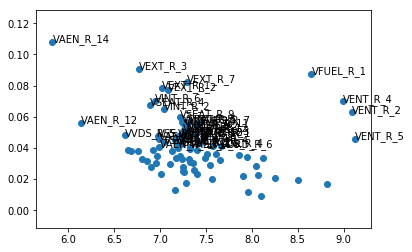

In [76]:
#fig, ax = plt.subplots()
plt.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.04:
        plt.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

In [77]:
#Calculate the average for each variable in the selected vehicle, then append the distance from all
vehicle = 'Nissan Sentra'
temp = pd.DataFrame(np.matmul(np.array(probDist[vehicle].index).astype(float),probDist[vehicle].applymap(float).as_matrix()),columns=['APEAL Score'],index=probDist[vehicle].columns)
tempdf = pd.concat([temp,varListdf.T[vehicle]],axis=1).dropna()
writer = pd.ExcelWriter('D:\LocalData\peterk2\Desktop\Distance Summary\Sentra Data.xlsx')
tempdf.sort_values(by=tempdf.columns[1], ascending=False).to_excel(writer,'Sheet1')

In [78]:
#tempdf.sort_values(by=tempdf.columns[0], ascending=True).to_excel(writer, 'Sheet2')
#writer.save()

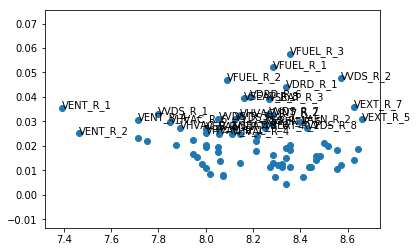

In [79]:
fig, ax = plt.subplots()
ax.scatter(tempdf.iloc[:,0],tempdf.iloc[:,1])
for i, txt in enumerate(list(tempdf.index)):
    if tempdf.iloc[:,1][i]>.025:
        ax.annotate(txt, (tempdf.iloc[:,0][i],tempdf.iloc[:,1][i]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017FCAEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000006A852B00>]], dtype=object)

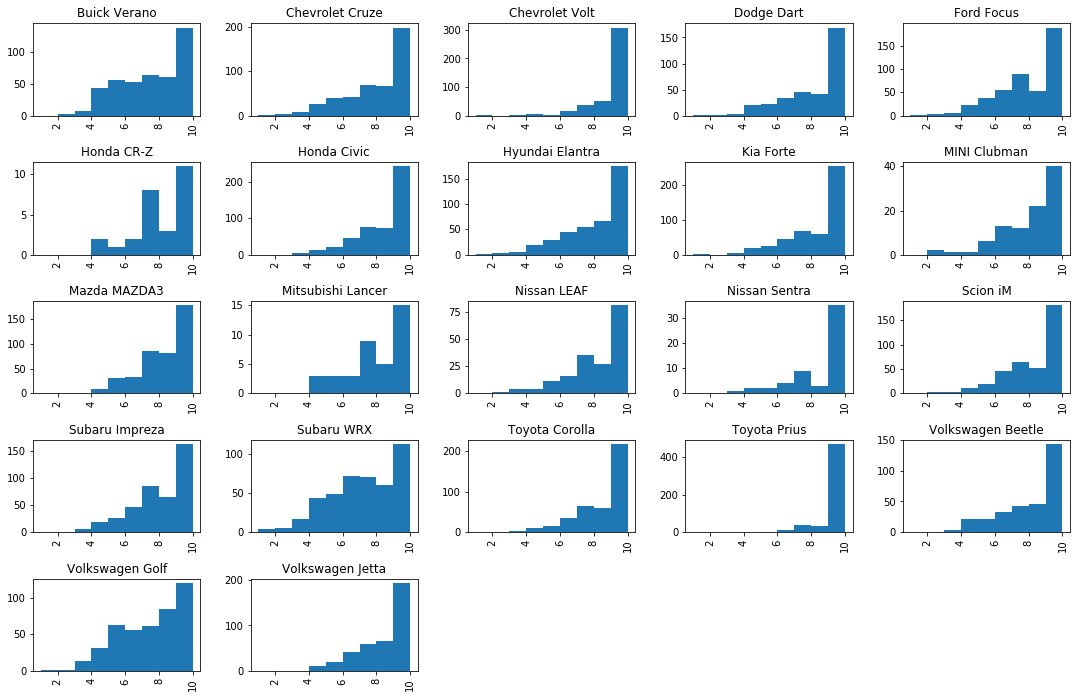

In [145]:
df=dfList[0][['Make_Series','Segment','VFUEL_R_3']]
df[df['Segment']=='Compact Car'].hist(by='Make_Series',bins=range(1,11), figsize=(18, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000636405C0>]], dtype=object)

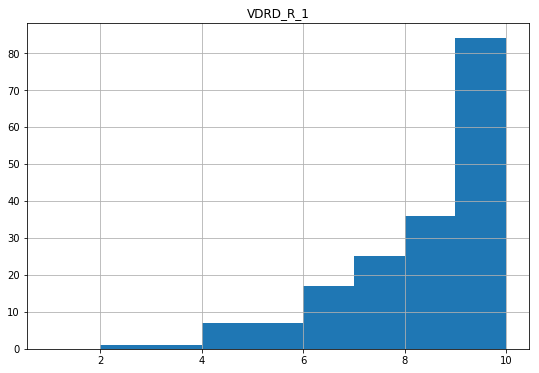

In [146]:
df=dfList[0][['Make_Series','VDRD_R_1']]
df[df['Make_Series']=='Nissan LEAF'].hist(bins=range(1,11), figsize=(9, 6))

Plotting probability distribution distance vs average for a demographic subset within a model

In [82]:
df=dfList[0]
var = 'VVDS_R_8'
model='Toyota Camry'
l=['Make','Make_Series','DEMO_INCM_1',var]
df = df[l].dropna()
dfs=df[df['Make_Series']==model].applymap(str)
len(dfs)

241

In [83]:
probDist={}
#probDist['all']=dfs[var].value_counts()/len(dfs[var])
avgProbDist=dfs[var].value_counts()/len(dfs[var])
for subset in dfs['DEMO_INCM_1'].unique():
    temp = dfs[dfs['DEMO_INCM_1']==subset]
    if temp['DEMO_INCM_1'].count() >= 10:
        probDist[subset]=temp[var].value_counts()/len(temp)
    
avgProbDist

10.0    0.290456
9.0     0.278008
7.0     0.120332
6.0     0.112033
8.0     0.107884
5.0     0.070539
4.0     0.020747
Name: VVDS_R_8, dtype: float64

In [84]:
tsdfModel=pd.DataFrame.from_dict(probDist).fillna(0).T
tsdfModel

,10.0,4.0,5.0,6.0,7.0,8.0,9.0
10.0,0.142857,0.057143,0.028571,0.142857,0.228571,0.114286,0.285714
11.0,0.291667,0.000000,0.083333,0.041667,0.166667,0.166667,0.250000
12.0,0.214286,0.000000,0.142857,0.285714,0.000000,0.000000,0.357143
2.0,0.400000,0.200000,0.000000,0.100000,0.100000,0.000000,0.200000
3.0,0.363636,0.090909,0.000000,0.090909,0.000000,0.000000,0.454545
4.0,0.363636,0.000000,0.090909,0.090909,0.045455,0.136364,0.272727
5.0,0.277778,0.000000,0.166667,0.055556,0.111111,0.111111,0.277778
6.0,0.470588,0.000000,0.058824,0.176471,0.117647,0.117647,0.058824
7.0,0.333333,0.000000,0.047619,0.095238,0.095238,0.142857,0.285714
8.0,0.250000,0.000000,0.000000,0.150000,0.100000,0.100000,0.400000


In [85]:
tsdfModel['dist']=np.log(np.sqrt(np.dot(tsdfModel,avgProbDist)))*-1

In [86]:
tsdfModel['avg']=np.dot(np.array(tsdfModel.T[:-1].index).astype(float),tsdfModel.T[:-1])
tsdfModel

,10.0,4.0,5.0,6.0,7.0,8.0,9.0,dist,avg
10.0,0.142857,0.057143,0.028571,0.142857,0.228571,0.114286,0.285714,1.079367,7.742857
11.0,0.291667,0.000000,0.083333,0.041667,0.166667,0.166667,0.250000,1.003705,8.333333
12.0,0.214286,0.000000,0.142857,0.285714,0.000000,0.000000,0.357143,1.064946,7.785714
2.0,0.400000,0.200000,0.000000,0.100000,0.100000,0.000000,0.200000,0.809933,7.900000
3.0,0.363636,0.090909,0.000000,0.090909,0.000000,0.000000,0.454545,0.946865,8.636364
4.0,0.363636,0.000000,0.090909,0.090909,0.045455,0.136364,0.272727,0.958914,8.500000
5.0,0.277778,0.000000,0.166667,0.055556,0.111111,0.111111,0.277778,1.010399,8.111111
6.0,0.470588,0.000000,0.058824,0.176471,0.117647,0.117647,0.058824,0.841688,8.352941
7.0,0.333333,0.000000,0.047619,0.095238,0.095238,0.142857,0.285714,0.984852,8.523810
8.0,0.250000,0.000000,0.000000,0.150000,0.100000,0.100000,0.400000,1.078982,8.500000


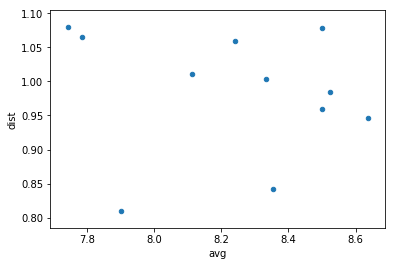

In [87]:
tsdfModel.plot(kind='scatter',x='avg',y='dist')

In [88]:
avg=np.dot(avgProbDist,np.array(avgProbDist.index).astype(float))
tsdfModel['avg']=tsdfModel['avg']-avg

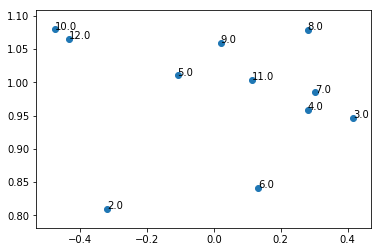

In [89]:
fig, ax = plt.subplots()
ax.scatter(tsdfModel['avg'],tsdfModel['dist'])
for i, txt in enumerate(list(tsdfModel.index)):
    ax.annotate(txt, (tsdfModel['avg'][i],tsdfModel['dist'][i]))

In [90]:
dfs[dfs['DEMO_INCM_1']=='13.0'].count()

0
Make           5
Make_Series    5
DEMO_INCM_1    5
VVDS_R_8       5
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000028B120F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002B2BA438>]], dtype=object)

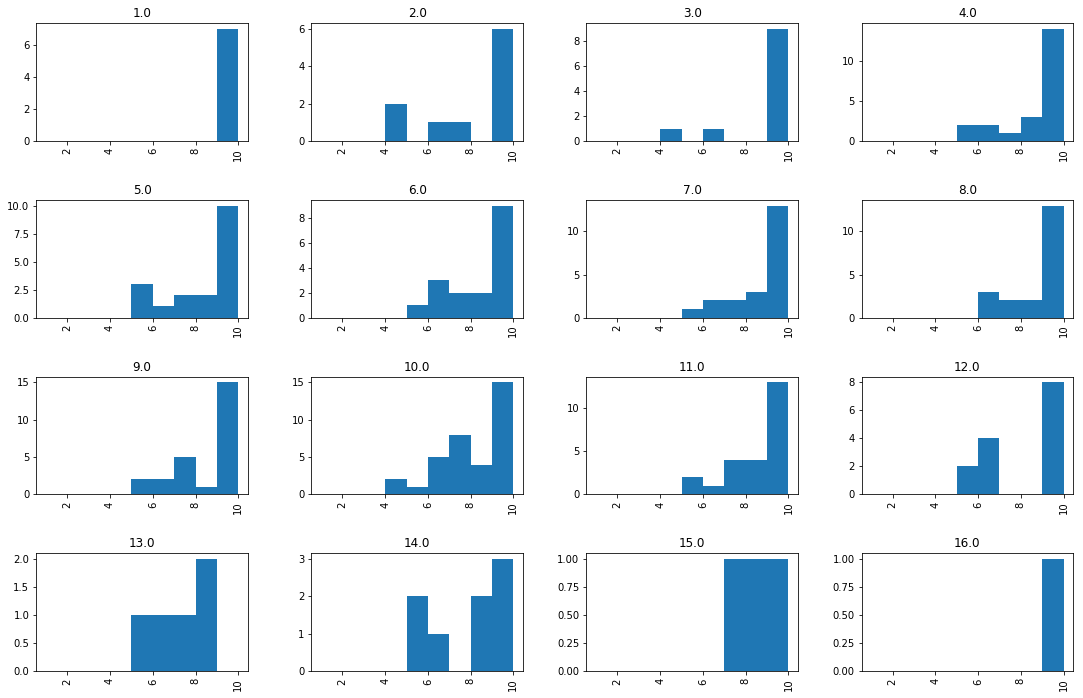

In [91]:
df[df['Make_Series']==model].hist(column=var, by='DEMO_INCM_1', bins=range(1,11), figsize=(18, 12))

Examine demographics for a segment

In [92]:
list(dfList[0].columns)

['OEM_Corporation',
 'Make',
 'Make_Premium_Non_Premium',
 'Make_Series',
 'Make_Model_and_Type',
 'Segment',
 'Super_Segment',
 'Origin',
 'Sub_Origin',
 'Sub_Sub_Origin',
 'PLANTASSEMBLY2',
 'RegionMfgr',
 'CountryMfgr',
 'Body_Style_MMCL',
 'Doors',
 'Vehicle_Status',
 'Vehicle_Status_Change',
 'VIN_Cylinders',
 'VIN_Drive_Type',
 'VIN_Engine_Type',
 'VIN_Litres',
 'QENGINE_TYPE',
 'SCR_G_1',
 'SCR_G_2',
 'SCR_G_3_1',
 'SCR_G_3_2',
 'SCR_G_3_3',
 'SCR_G_3_4',
 'SCR_G_3_5',
 'SCR_G_3_6',
 'SCR_G_3_7',
 'SCR_G_3_8',
 'SCR_G_3_97',
 'SCR_G_4_1',
 'SCR_G_4_2',
 'SCR_G_4_3',
 'SCR_G_4_4',
 'SCR_G_4_5',
 'SCR_G_4_6',
 'SCR_G_4_7',
 'SCR_G_4_8',
 'SCR_G_4_97',
 'EXT00_SCR_1',
 'EXT00_SCR_2',
 'DEXP00_SCR_1',
 'DEXP00_SCR_2',
 'FCD00_SCR_1',
 'FCD00_SCR_2',
 'FCD00_SCR_3',
 'FCD00_SCR_4',
 'FCD00_SCR_5',
 'FCD00_SCR_6',
 'FCD00_SCR_7',
 'FCD00_SCR_8',
 'FCD00_SCR_9',
 'FCD00_SCR_10',
 'FCD00_SCR_11',
 'FCD00_SCR_12',
 'AEN00_SCR_1',
 'AEN00_SCR_2',
 'AEN00_SCR_3',
 'AEN00_SCR_4',
 'AEN00_SC

In [93]:
df=dfList[0]
varList=['Make','Make_Premium_Non_Premium','Make_Series','Segment','DEMO_INCM_1','Demo_Census_4','Demo_Census_9','Demo_AgeBucket','DEMO_GNDR_1','Cus_BrandExp','VEXT_R_1','VEXT_R_2','VEXT_R_3','VEXT_R_4','VEXT_R_5','VEXT_R_6','VEXT_R_7','VINT_R_1','VINT_R_2','VINT_R_3','VINT_R_4','VINT_R_5','VINT_R_6','VINT_R_7','VINT_R_8','VINT_R_9','VINT_R_10','VINT_R_11','VSS_R_1','VSS_R_2','VSS_R_3','VSS_R_4','VSS_R_5','VSS_R_7','VSS_R_9','VSS_R_10','VSS_R_11','VSS_R_12','VAEN_R_1','VAEN_R_2','VAEN_R_3','VAEN_R_4','VAEN_R_5','VAEN_R_6','VAEN_R_7','VAEN_R_8','VAEN_R_9','VAEN_R_10','VAEN_R_11','VAEN_R_12','VAEN_R_13','VAEN_R_14','VAEN_R_15','VAEN_R_16','VAEN_R_17','VSEAT_R_1','VSEAT_R_2','VSEAT_R_3','VSEAT_R_4','VSEAT_R_5','VSEAT_R_6','VSEAT_R_7','VSEAT_R_8','VSEAT_R_9','VSEAT_R_10','VSEAT_R_11','VSEAT_R_12','VHVAC_R_1','VHVAC_R_2','VHVAC_R_3','VHVAC_R_4','VHVAC_R_5','VHVAC_R_6','VHVAC_R_7','VDRD_R_1','VDRD_R_2','VDRD_R_3','VDRD_R_4','VDRD_R_5','VDRD_R_6','VDRD_R_7','VDRD_R_8','VDRD_R_9','VDRD_R_10','VENT_R_1','VENT_R_2','VENT_R_3','VENT_R_4','VENT_R_5','VENT_R_6','VVDS_R_1','VVDS_R_2','VVDS_R_3','VVDS_R_4','VVDS_R_5','VVDS_R_6','VVDS_R_7','VVDS_R_8','VFUEL_R_1','VFUEL_R_2','VFUEL_R_3']
df = df[varList]#.dropna()
df.head()

,Make,Make_Premium_Non_Premium,Make_Series,Segment,DEMO_INCM_1,Demo_Census_4,Demo_Census_9,Demo_AgeBucket,DEMO_GNDR_1,Cus_BrandExp,...,VVDS_R_2,VVDS_R_3,VVDS_R_4,VVDS_R_5,VVDS_R_6,VVDS_R_7,VVDS_R_8,VFUEL_R_1,VFUEL_R_2,VFUEL_R_3
1,Cadillac,Premium,Cadillac CTS,Midsize Premium Car,13.0,3.0,5.0,12.0,1.0,1.0,...,9.0,6.0,7.0,9.0,NaN,9.0,9.0,5.0,5.0,5.0
2,Cadillac,Premium,Cadillac CTS,Midsize Premium Car,10.0,3.0,5.0,10.0,0.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,Cadillac,Premium,Cadillac CTS,Midsize Premium Car,NaN,3.0,5.0,12.0,1.0,1.0,...,9.0,9.0,9.0,9.0,8.0,9.0,9.0,8.0,9.0,9.0
4,Cadillac,Premium,Cadillac Escalade,Large Premium SUV,15.0,3.0,5.0,12.0,1.0,1.0,...,9.0,5.0,10.0,6.0,7.0,8.0,9.0,4.0,4.0,4.0
5,Cadillac,Premium,Cadillac SRX,Midsize Premium SUV,14.0,2.0,3.0,7.0,0.0,0.0,...,8.0,7.0,8.0,7.0,6.0,8.0,7.0,5.0,5.0,5.0


In [94]:
df.iloc[:,10:].apply(pd.value_counts)

,VEXT_R_1,VEXT_R_2,VEXT_R_3,VEXT_R_4,VEXT_R_5,VEXT_R_6,VEXT_R_7,VINT_R_1,VINT_R_2,VINT_R_3,...,VVDS_R_2,VVDS_R_3,VVDS_R_4,VVDS_R_5,VVDS_R_6,VVDS_R_7,VVDS_R_8,VFUEL_R_1,VFUEL_R_2,VFUEL_R_3
1.0,57,30,42,123,69,66,20,63,62,110,...,126,89,47,233,252,41,35,304,278,261
2.0,152,53,121,186,78,117,27,88,123,252,...,183,161,71,592,666,45,55,609,525,555
3.0,318,171,339,422,159,295,82,227,340,737,...,409,348,348,1636,1887,182,268,2080,1663,1671
4.0,1641,1572,2013,2342,1379,2401,1108,1911,2418,2448,...,2225,2461,1940,4133,4359,1647,1888,6275,5672,5695
5.0,2561,2523,3003,2915,2038,3181,2070,2889,3365,3348,...,2910,3201,2739,4915,5109,2441,3179,7870,7230,7461
6.0,4878,5059,5596,4989,4043,5241,4550,5052,5696,5530,...,4851,5363,4946,6824,6944,4683,5842,9541,9258,9380
7.0,8480,8870,8925,8605,8252,8746,8178,8768,8924,9051,...,8855,9272,9075,9156,9281,9002,9121,10233,10432,10382
8.0,8377,8720,9039,8602,7811,8629,9148,8643,9026,9099,...,8490,8908,8791,9537,9417,8560,10461,9693,9876,10059
9.0,14187,14563,14251,13999,14196,14147,16822,14151,14136,13922,...,13755,14485,14631,12735,12161,14411,16837,9478,10345,10613
10.0,29113,28197,26416,27530,31731,26712,28013,27981,25682,25315,...,27852,25202,27174,20052,19032,28723,22332,13096,13810,13941


In [95]:
probDist={}
temp=df.iloc[:,10:].apply(pd.value_counts)
probDist['all']=temp/temp.sum().T
usedVehicleList = []
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Non-Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['NonPremium']=temp.value_counts()/temp.sum()
#temp = dfs[dfs['Make_Premium_Non_Premium']=='Premium'].iloc[:,1:].apply(pd.value_counts).drop('nan')
#probDist['Premium']=temp.value_counts()/temp.sum()

for var in varList[:10]:
    for m in df[var].unique():
        temp = df[df[var]==m].iloc[:,10:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        if temp.sum().max() >= 60:
            for a in list(temp.columns):
                if temp[a].sum() < 60:
                    temp = temp.drop(a, axis=1)
            #print(var,m)
            varString = str(var)+"-"+str(m)
            #print(varString)
            probDist[varString]=(temp/temp.sum()).fillna(0)
            usedVehicleList.append(varString)
        else:
            print(m)

Acura RLX
Audi allroad
Audi A8
BMW Z4
Cadillac ELR
Honda CR-Z
Hyundai Equus
Kia Cadenza
Mercedes-Benz G-Class
Mercedes-Benz SLK-Class
Mercedes-Benz SL-Class
MINI Paceman
Mercedes-Benz Metris
Mercedes-Benz AMG GT
Mitsubishi i-MiEV
Nissan GT-R
Toyota Mirai
Volvo S80
Dodge Viper
Ram ProMaster City
Ford Flex
Ford Taurus
Hyundai Genesis Coupe
Mercedes-Benz B-Class
Jaguar XJ
BMW i8
Mitsubishi Lancer
Infiniti Q70
Kia K900
Lincoln MKS
Nissan Sentra
Infiniti QX60
Lincoln MKT
Toyota Yaris
BMW i3
Chevrolet SS
Fiat 500L
Nissan Quest
nan
nan
nan
nan


In [96]:
#calculate distance matrix
from itertools import combinations
ks=list(probDist.keys())
distanceMatrix = pd.DataFrame(np.zeros((len(ks), len(ks))),index=ks, columns=ks)
for k1, k2 in combinations(ks, 2):
    t=np.sqrt(probDist[k1]*probDist[k2]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    dd=np.sqrt(np.dot(d,d))
    distanceMatrix.loc[k1,k2]=dd
    distanceMatrix.loc[k2,k1]=dd

In [97]:
distanceMatrix.head()

,Make_Series-BMW X3,Make_Series-Honda HR-V,Make_Series-Jeep Patriot,Make_Series-Ford Explorer,Make_Series-Volvo XC60,Make_Series-Land Rover LR4,Segment-Large Light Duty Pickup,Make_Series-Ram 1500 LD,Make-Fiat,DEMO_INCM_1-16.0,...,Make_Series-BMW 3 Series,Make_Series-Mercedes-Benz GLE-Class,Make_Series-Lexus RX,Make_Series-BMW X6,Make_Series-Audi Q3,Make_Series-Cadillac SRX,Make_Series-Lexus NX,Make_Series-Kia Rio,Make_Series-Toyota Prius c,Make_Series-Infiniti QX70
Make_Series-BMW X3,0.000000,0.376149,0.586940,0.129877,0.129069,0.206496,0.122654,0.159409,0.450861,0.098053,...,0.102822,0.093854,0.122101,0.280797,0.179802,0.139697,0.136105,0.582602,0.681118,0.300093
Make_Series-Honda HR-V,0.376149,0.000000,0.161884,0.267999,0.285374,0.458288,0.267873,0.272501,0.150921,0.355956,...,0.440192,0.448514,0.496769,0.801981,0.240205,0.262772,0.262247,0.224206,0.269956,0.696207
Make_Series-Jeep Patriot,0.586940,0.161884,0.000000,0.375560,0.450372,0.638598,0.379162,0.346051,0.145960,0.545105,...,0.683798,0.643688,0.674580,1.013310,0.396503,0.362874,0.403333,0.193796,0.396715,0.913226
Make_Series-Ford Explorer,0.129877,0.267999,0.375560,0.000000,0.105934,0.191228,0.076480,0.091752,0.267258,0.114675,...,0.162336,0.149708,0.172496,0.355128,0.127750,0.070578,0.101646,0.412962,0.589571,0.367540
Make_Series-Volvo XC60,0.129069,0.285374,0.450372,0.105934,0.000000,0.208322,0.134739,0.168468,0.341899,0.128891,...,0.150697,0.165825,0.208400,0.393682,0.100209,0.117211,0.091837,0.504445,0.623980,0.363966


In [98]:
a=distanceMatrix.stack()
a[a>1.9]

Make_Series-Ford Transit Connect     Make_Series-Porsche 911                2.157475
                                     Make_Series-BMW 6 Series               2.129351
                                     Make_Series-Porsche Boxster            1.983708
Make_Series-Mercedes-Benz CLS-Class  Make_Series-Fiat 500                   1.907345
Make_Series-Mercedes-Benz S-Class    Make_Series-Fiat 500                   2.161229
Make_Series-Lexus LS                 Make_Series-Fiat 500                   2.045565
Make_Series-BMW 7 Series             Make_Series-Fiat 500                   2.259897
Make_Series-Porsche 911              Make_Series-Ford Transit Connect       2.157475
                                     Make_Series-Fiat 500                   2.049615
Make_Series-Fiat 500                 Make_Series-Mercedes-Benz CLS-Class    1.907345
                                     Make_Series-Mercedes-Benz S-Class      2.161229
                                     Make_Series-Lexus LS        

D:\WinPython\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


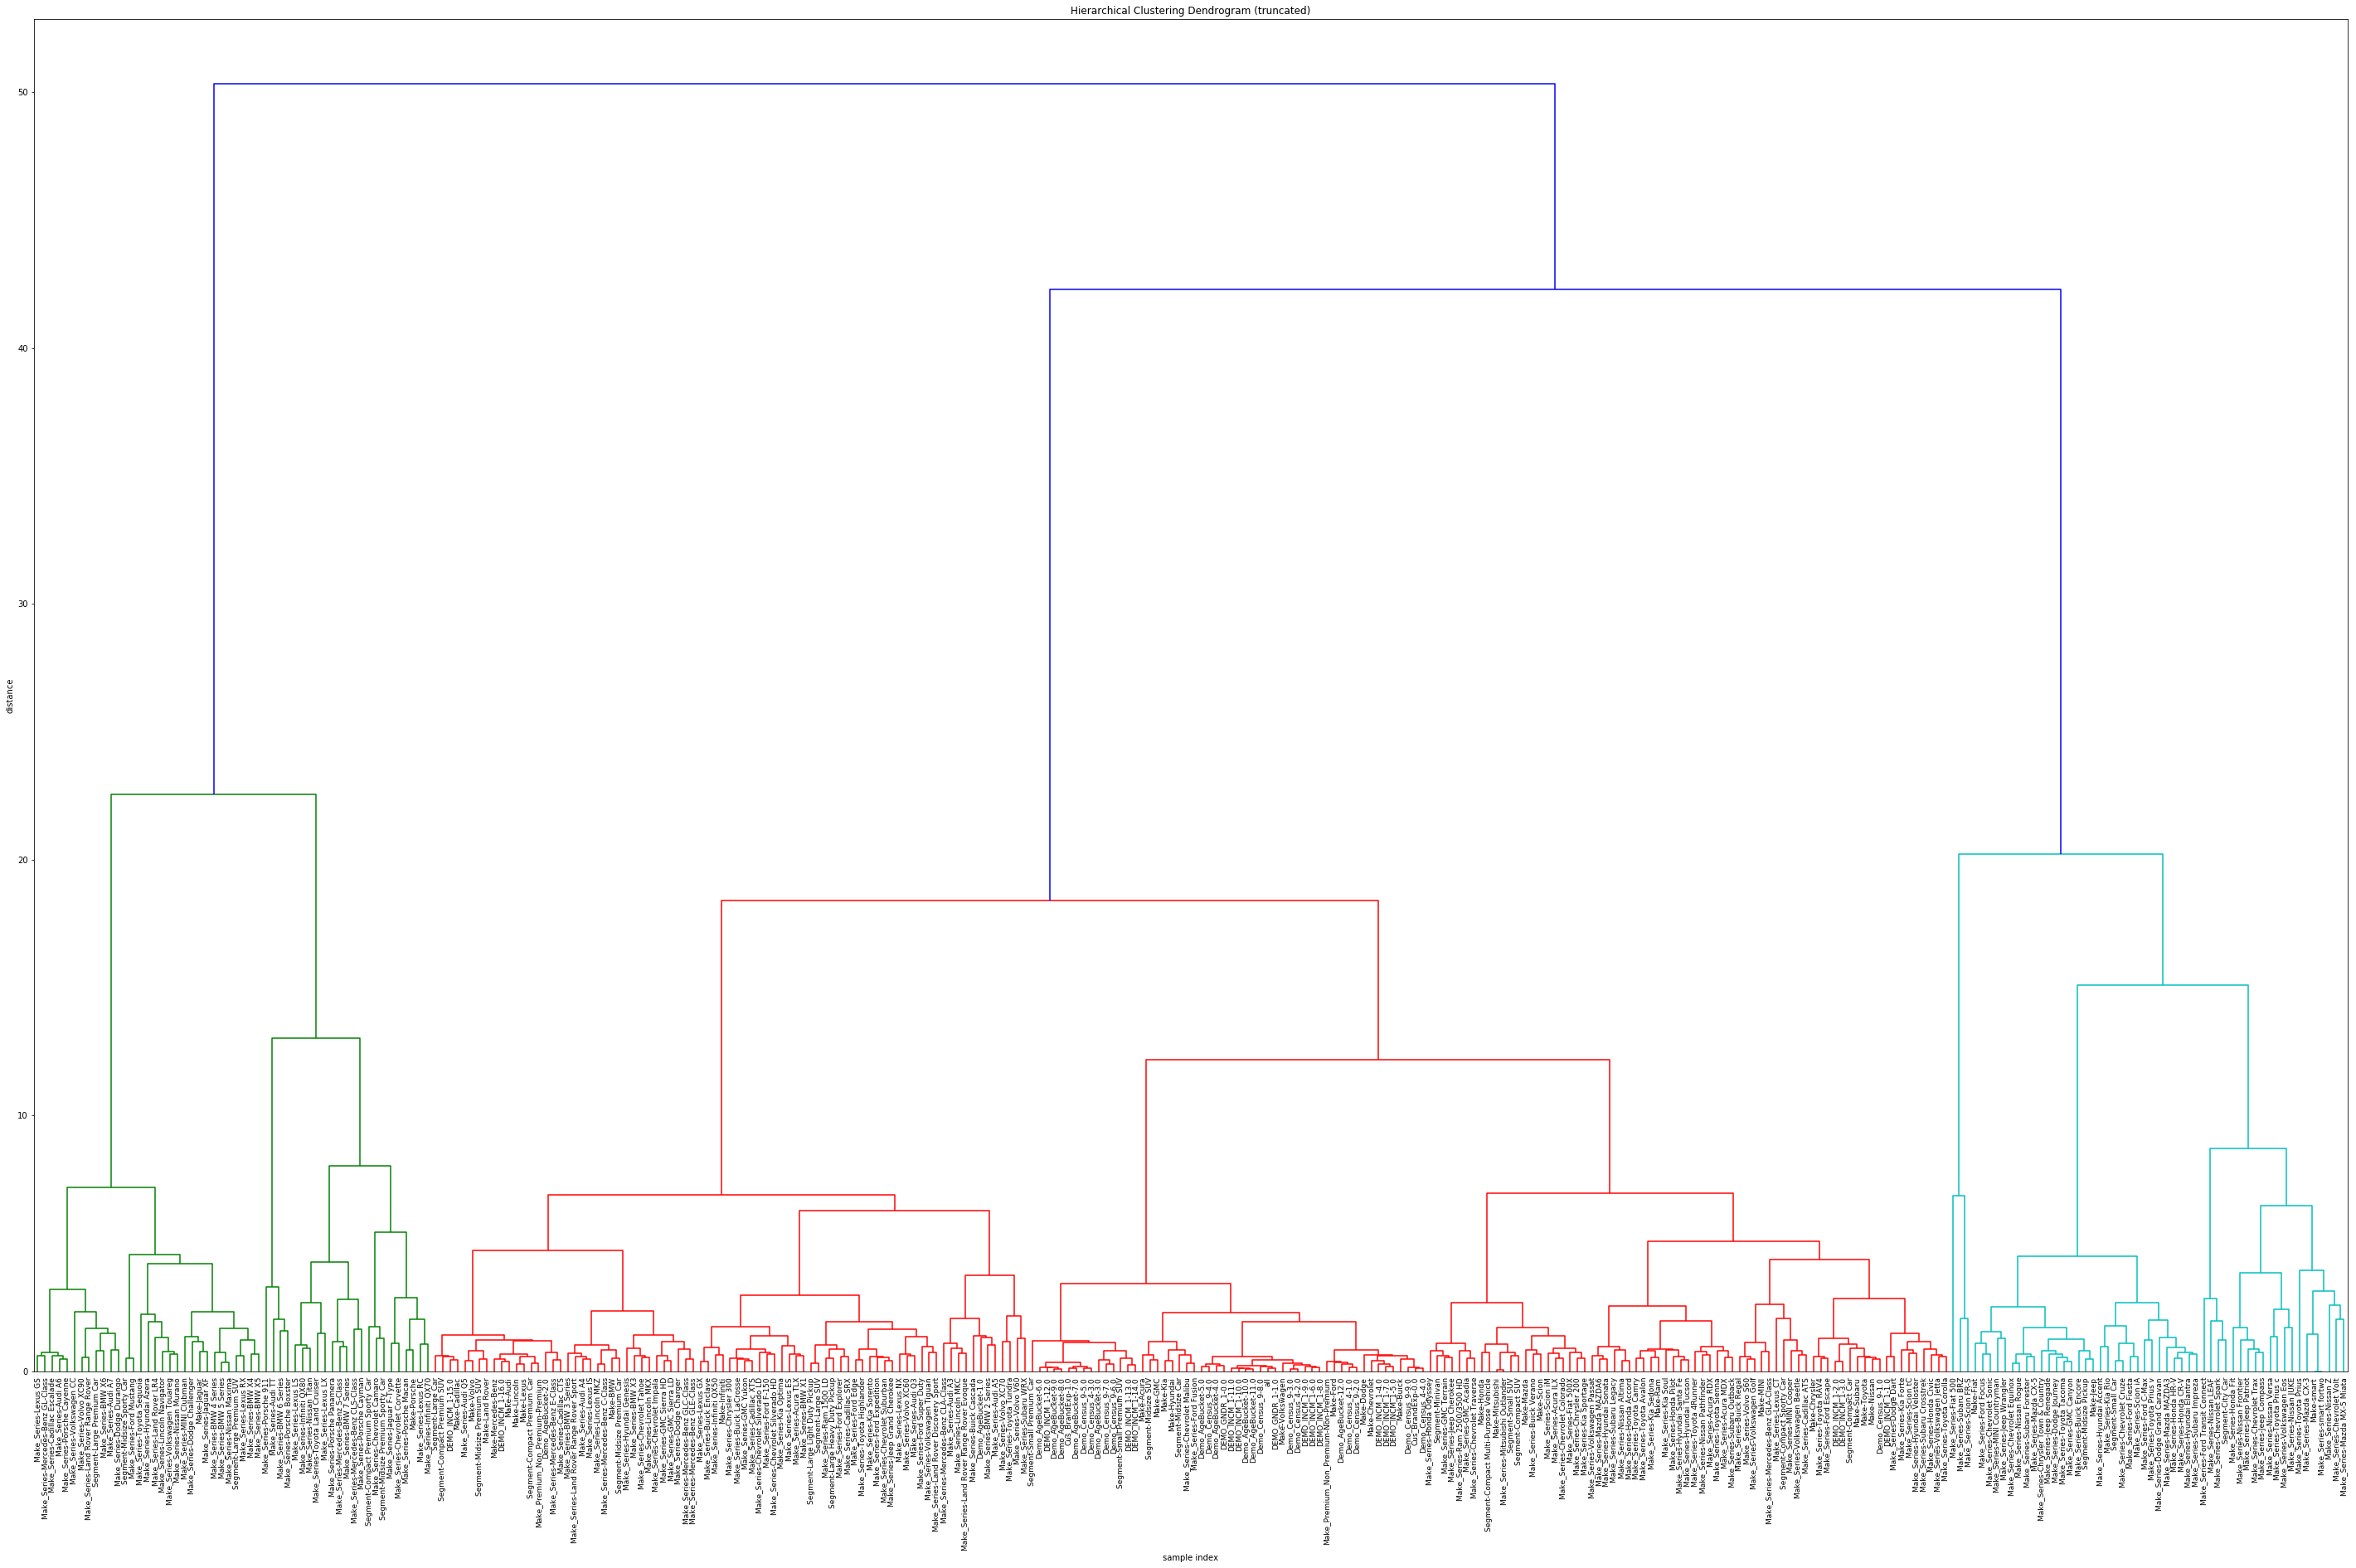

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(distanceMatrix, 'ward')
# calculate full dendrogram
plt.figure(figsize=(50, 30))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=9.,
    labels = list(distanceMatrix.columns)
)
plt.show()

In [102]:
probDist={}
temp=df.iloc[:,10:].apply(pd.value_counts)
probDist['all']=temp/temp.sum().T
#sliceVar = 'Segment'
#subset = 'Compact Car'
#dfs = df[df[sliceVar]==subset].drop(sliceVar, axis=1)
#temp=df.iloc[:,9:].apply(pd.value_counts)
#probDist[subset]=temp/temp.sum().T
usedVehicleList = []
varList = list(df.columns)
for var in varList[:9]:
    for m in df[var].unique():
        temp = df[df[var]==m].iloc[:,9:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        if temp.sum().max() >= 60:
            for a in list(temp.columns):
                if temp[a].sum() < 60:
                    temp = temp.drop(a, axis=1)
            #print(var,m)
            varString = str(var)+"-"+str(m)
            #print(varString)
            probDist[varString]=(temp/temp.sum()).fillna(0)
            usedVehicleList.append(varString)
        else:
            print(m)

Acura RLX
Audi allroad
Audi A8
BMW Z4
Cadillac ELR
Honda CR-Z
Hyundai Equus
Kia Cadenza
Mercedes-Benz G-Class
Mercedes-Benz SLK-Class
Mercedes-Benz SL-Class
MINI Paceman
Mercedes-Benz Metris
Mercedes-Benz AMG GT
Mitsubishi i-MiEV
Nissan GT-R
Toyota Mirai
Volvo S80
Dodge Viper
Ram ProMaster City
Ford Flex
Ford Taurus
Hyundai Genesis Coupe
Mercedes-Benz B-Class
Jaguar XJ
BMW i8
Mitsubishi Lancer
Infiniti Q70
Kia K900
Lincoln MKS
Nissan Sentra
Infiniti QX60
Lincoln MKT
Toyota Yaris
BMW i3
Chevrolet SS
Fiat 500L
Nissan Quest
nan
nan
nan


In [103]:
ks=list(probDist.keys())
distanceMatrix = pd.DataFrame(np.zeros((len(ks), len(ks))),index=ks, columns=ks)
for k1, k2 in combinations(ks, 2):
    t=np.sqrt(probDist[k1]*probDist[k2]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    dd=np.sqrt(np.dot(d,d))
    distanceMatrix.loc[k1,k2]=dd
    distanceMatrix.loc[k2,k1]=dd

In [104]:
distanceMatrix.head()

,Make_Series-BMW X3,Make_Series-Honda HR-V,Make_Series-Jeep Patriot,Make_Series-Ford Explorer,Make_Series-Volvo XC60,Make_Series-Land Rover LR4,Segment-Large Light Duty Pickup,Make_Series-Ram 1500 LD,Make-Fiat,DEMO_INCM_1-16.0,...,Make_Series-BMW 3 Series,Make_Series-Mercedes-Benz GLE-Class,Make_Series-Lexus RX,Make_Series-BMW X6,Make_Series-Audi Q3,Make_Series-Cadillac SRX,Make_Series-Lexus NX,Make_Series-Kia Rio,Make_Series-Toyota Prius c,Make_Series-Infiniti QX70
Make_Series-BMW X3,0.000000,0.376154,0.587041,0.130030,0.129076,0.206893,0.123235,0.159504,0.451625,0.098066,...,0.104939,0.093880,0.123879,0.280930,0.181200,0.139758,0.136128,0.582745,0.681125,0.300095
Make_Series-Honda HR-V,0.376154,0.000000,0.163396,0.268002,0.285449,0.458965,0.267906,0.272865,0.156891,0.355956,...,0.440307,0.448514,0.496870,0.801985,0.243184,0.262773,0.262399,0.225599,0.269956,0.696207
Make_Series-Jeep Patriot,0.587041,0.163396,0.000000,0.377098,0.450395,0.638598,0.381960,0.346053,0.145997,0.545509,...,0.686697,0.644097,0.677508,1.014073,0.396509,0.364001,0.403343,0.193796,0.397553,0.913410
Make_Series-Ford Explorer,0.130030,0.268002,0.377098,0.000000,0.106790,0.194857,0.076485,0.094771,0.273702,0.114685,...,0.162391,0.149712,0.172548,0.355128,0.138385,0.070578,0.103026,0.414666,0.589571,0.367547
Make_Series-Volvo XC60,0.129076,0.285449,0.450395,0.106790,0.000000,0.208404,0.136423,0.168474,0.342256,0.129027,...,0.154288,0.165971,0.210999,0.394043,0.101019,0.117655,0.091837,0.504480,0.624039,0.363995


In [105]:
list(df['Segment'].unique())

['Midsize Premium Car',
 'Large Premium SUV',
 'Midsize Premium SUV',
 'Large SUV',
 'Midsize Pickup',
 'Midsize Premium Sporty Car',
 'Compact Car',
 'Compact SUV',
 'Midsize Car',
 'Large Car',
 'Large Light Duty Pickup',
 'Small Car',
 'Midsize SUV',
 'Large Heavy Duty Pickup',
 'Small SUV',
 'Minivan',
 'Midsize Sporty Car',
 'Compact Premium Sporty Car',
 'Compact Premium SUV',
 'Small Premium Car',
 'Compact Premium Car',
 'Compact Sporty Car',
 'Compact Multi-Purpose Vehicle',
 'Small Premium SUV',
 'Large Premium Car',
 'City Car']

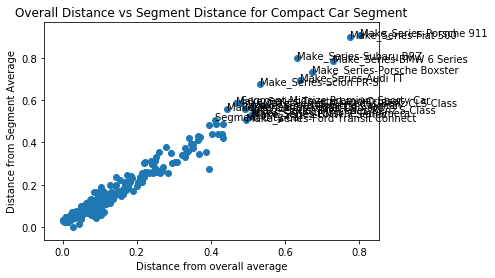

In [106]:
var = 'Segment-Midsize Car'
singleSegDistance = distanceMatrix[var]
overallDist = distanceMatrix['all']
tempdf = pd.concat([overallDist,singleSegDistance],axis=1).dropna()
#fig, ax = plt.subplots()
plt.scatter(tempdf['all'],tempdf[var])
plt.xlabel('Distance from overall average')
plt.ylabel('Distance from Segment Average')
plt.title('Overall Distance vs Segment Distance for Compact Car Segment')
for txt in list(tempdf.index):
    if tempdf.loc[txt,var]>0.5:
        plt.annotate(txt, (tempdf.loc[txt,'all'],tempdf.loc[txt,var]))

In [107]:
var = 'Segment-Compact Car'
singleSegDistance = distanceMatrix[var]
overallDist = distanceMatrix['all']
tempdf = pd.concat([overallDist,singleSegDistance],axis=1).dropna()

In [108]:
tempdf

,all,Segment-Compact Car
Make_Series-BMW X3,0.132260,0.242096
Make_Series-Honda HR-V,0.143178,0.093625
Make_Series-Jeep Patriot,0.248847,0.194856
Make_Series-Ford Explorer,0.075456,0.171921
Make_Series-Volvo XC60,0.100754,0.199159
Make_Series-Land Rover LR4,0.218603,0.395433
Segment-Large Light Duty Pickup,0.048425,0.136756
Make_Series-Ram 1500 LD,0.063939,0.129982
Make-Fiat,0.155519,0.123418
DEMO_INCM_1-16.0,0.076074,0.189166


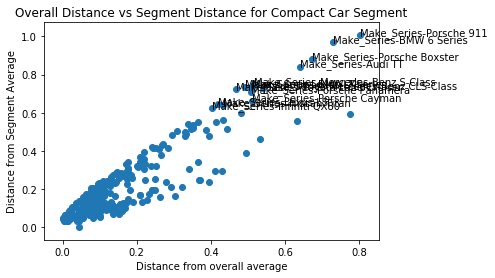

In [109]:
singleSegDistance = distanceMatrix[var]
overallDist = distanceMatrix['all']
tempdf = pd.concat([overallDist,singleSegDistance],axis=1).dropna()
#fig, ax = plt.subplots()
plt.scatter(tempdf['all'],tempdf[var])
plt.xlabel('Distance from overall average')
plt.ylabel('Distance from Segment Average')
plt.title('Overall Distance vs Segment Distance for Compact Car Segment')
for txt in list(tempdf.index):
    if tempdf.loc[txt,var]>0.6:
        plt.annotate(txt, (tempdf.loc[txt,'all'],tempdf.loc[txt,var]))

In [419]:
varList=['Segment','Make_Premium_Non_Premium','DEMO_INCM_1','Demo_Census_4','Demo_Census_9','Demo_AgeBucket','DEMO_US_1B','DEMO_US_1C','DEMO_US_1D','DEMO_US_1E','DEMO_US_1F','DEMO_US_1G','DEMO_US_1H','DEMO_US_1I','DEMO_US_1J','DEMO_US_1K','DEMO_US_1L','Buyer_Segment','YPV_US_1','YNV_US_1A9','YNV_GLB_3','YNV_GLB_4','YNV_GLB_5','YNV_GLB_6','YNV_GLB_7','YNV_GLB_8','YNV_GLB_9','YNV_GLB_10','YNV_GLB_11','YNV_GLB_12','YNV_GLB_14','YNV_GLB_15','YNV_GLB_16','APEAL_OSAT']
df=dfList[0][varList]
#df = df[df['Make_Premium_Non_Premium']=='Premium']
probDist={}
avgDict={}
avgDict['all']=df.iloc[:,2:].mean()
temp=df.iloc[:,2:].apply(pd.value_counts)
probDist['all']=temp/temp.sum().T
#sliceVar = 'Segment'
#subset = 'Compact Car'
#dfs = df[df[sliceVar]==subset].drop(['Make','Segment','Make_Premium_Non_Premium'], axis=1)
#temp=dfs.iloc[:,3:].apply(pd.value_counts)
#probDist[subset]=temp/temp.sum().T
usedVehicleList = []
for var in varList[:1]:
    for m in df[var].unique():
        temp = df[df[var]==m].iloc[:,2:].apply(pd.value_counts)
        if 'nan' in list(temp.index):
            temp=temp.drop('nan')
        if temp.sum().max() >= 80:
            for a in list(temp.columns):
                if temp[a].sum() < 80:
                    temp = temp.drop(a, axis=1)
                    
            #print(var,m)
            #varString = str(var)+"-"+str(m)
            #print(varString)
            probDist[m]=(temp/temp.sum()).fillna(0)
            avgDict[m]=df[df[var]==m].iloc[:,2:].mean()
            usedVehicleList.append(varString)
        else:
            print(m)

In [420]:
avgStack = []
#for key, value in avgDict.items():
#    avgStack.append([[key]+ value.values])
avgStack = pd.DataFrame.from_dict(avgDict)
del avgStack.index.name
#avgStack = pd.DataFrame(avgStack, columns=['subset','avg'])

In [421]:
avgStack.T

,DEMO_INCM_1,Demo_Census_4,Demo_Census_9,Demo_AgeBucket,DEMO_US_1B,DEMO_US_1C,DEMO_US_1D,DEMO_US_1E,DEMO_US_1F,DEMO_US_1G,...,YNV_GLB_7,YNV_GLB_8,YNV_GLB_9,YNV_GLB_10,YNV_GLB_11,YNV_GLB_12,YNV_GLB_14,YNV_GLB_15,YNV_GLB_16,APEAL_OSAT
City Car,8.603217,3.401447,7.213382,7.873536,3.461538,3.162162,3.004158,2.577963,2.837838,2.966736,...,1.033264,1.018711,2.931393,0.893905,7.747449,6.706633,2.036939,3.609148,3.130977,8.114754
Compact Car,7.554916,2.773941,5.476289,7.292443,3.483648,3.317954,2.989279,2.646085,2.654906,2.886009,...,1.146831,1.083865,3.081965,0.880221,6.741113,6.751781,2.268344,3.672683,3.332610,8.519469
Compact Multi-Purpose Vehicle,7.919395,3.011244,6.052474,8.994775,3.603587,3.312108,3.194619,2.517489,2.907623,2.641256,...,1.147085,1.183857,2.802691,0.902530,7.412134,6.402823,2.094340,3.727354,3.385650,8.532815
Compact Premium Car,11.047202,2.658723,5.189704,8.390820,3.236425,3.501131,2.415837,2.827602,2.533258,3.279412,...,1.114706,1.083710,3.330090,0.922054,4.366342,3.920122,1.635696,3.725566,3.389593,8.857331
Compact Premium SUV,11.732717,2.635573,5.150344,8.546149,3.201646,3.505689,2.407407,2.744856,2.526023,3.219802,...,1.129267,1.100460,3.218349,0.936004,4.263241,3.565252,1.589295,3.712418,3.338901,8.780374
Compact Premium Sporty Car,11.997802,3.001445,5.986994,8.671078,2.858537,3.534959,1.887805,3.117073,2.250407,3.512195,...,1.065041,1.027642,4.395122,0.892977,3.852552,4.399240,1.742063,3.795122,3.417886,9.313788
Compact SUV,8.194507,2.424611,4.597417,8.202412,3.537058,3.367876,2.835098,2.603965,2.547421,2.820906,...,1.247578,1.162875,3.104979,0.885940,6.428458,5.760207,2.195946,3.658932,3.343996,8.372841
Compact Sporty Car,8.749265,2.923638,5.796206,7.585502,3.348502,3.352941,2.577137,2.795782,2.428968,3.441176,...,1.081576,1.055494,4.160932,0.907187,6.055381,5.543770,2.076159,3.712542,3.259711,8.748652
Large Car,9.106946,2.501911,4.724204,8.982639,3.430682,3.490530,2.532955,2.892803,2.441667,3.311364,...,1.117045,1.093182,3.479924,0.867636,5.469415,5.958314,2.163124,3.748864,3.426894,8.903132
Large Heavy Duty Pickup,9.908066,2.752193,5.454496,8.197740,3.337604,3.591288,2.358104,3.186419,2.247918,3.194747,...,1.880205,2.960282,3.396541,0.895028,5.564103,5.409486,2.355688,3.784753,3.573991,8.683787


In [422]:
from itertools import combinations
ks=list(probDist.keys())
header = ['subset1','subset2']
header = header +varList[4:]

In [423]:
distanceStack = []
for k1, k2 in combinations(ks, 2):
    #print(k1,k2)
    t=np.sqrt(probDist[k1]*probDist[k2]).sum()
    t=t[t!=0]
    d=np.log(t)*-1
    distanceStack.append([k1,k2]+list(d))
    distanceStack.append([k2,k1]+list(d))

cols = ['subset1','subset2']
cols = cols+varList[2:]
distanceStack = pd.DataFrame(distanceStack,columns=cols)

In [427]:
var = 'YNV_GLB_16'
distanceStackAll = distanceStack[distanceStack['subset1']=='all'].drop('subset1',axis=1).reset_index(drop=True).set_index('subset2')
del distanceStackAll.index.name
dfIncome = pd.concat([avgStack.T[var],distanceStackAll[var]], axis=1).dropna()
dfIncome.columns=['average','distance']

In [428]:
dfIncome.sort_values(by='distance', ascending=False)

,average,distance
City Car,3.130977,0.018660
Large Heavy Duty Pickup,3.573991,0.015680
Large Light Duty Pickup,3.551158,0.011965
Large Premium Car,3.499218,0.007973
Midsize Premium Sporty Car,3.469731,0.006580
Large SUV,3.487056,0.004874
Compact Sporty Car,3.259711,0.004816
Midsize Sporty Car,3.468345,0.004153
Large Premium SUV,3.466972,0.003415
Compact Premium Sporty Car,3.417886,0.003348


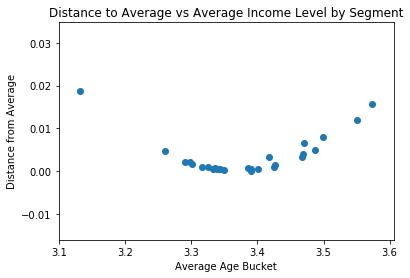

In [431]:
plt.scatter(dfIncome.iloc[:,0],dfIncome.iloc[:,1])
plt.xlabel('Average Age Bucket')
plt.ylabel('Distance from Average')
plt.title('Distance to Average vs Average Income Level by Segment')
for i, txt in enumerate(list(dfIncome.index)):
    if dfIncome.iloc[i,1]>0.02:
        plt.annotate(txt, (dfIncome.iloc[i,0],dfIncome.iloc[i,1]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000006AE14E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000005CFF6B70>]], dtype=object)

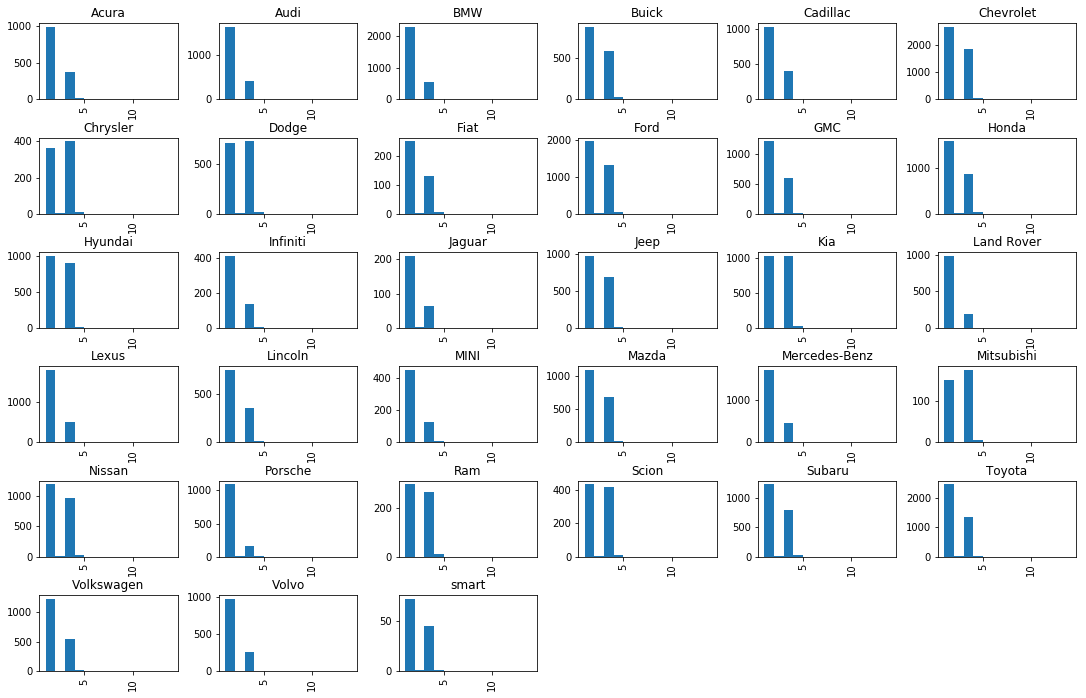

In [410]:
dfList[0][['Make',var]].hist(by='Make', bins=range(1,15), figsize=(18, 12))

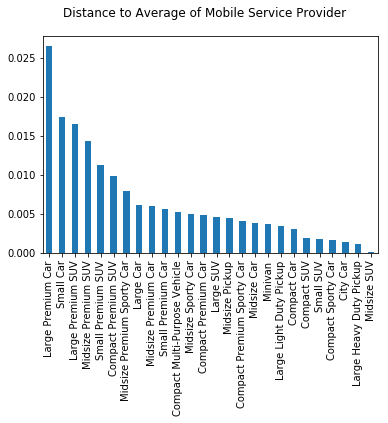

In [418]:
var = 'YNV_GLB_14'
distanceStackAll[var].sort_values(ascending=False).plot.bar()
plt.suptitle("Distance to Average of Mobile Service Provider")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000254F74A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ECC23C8>]], dtype=object)

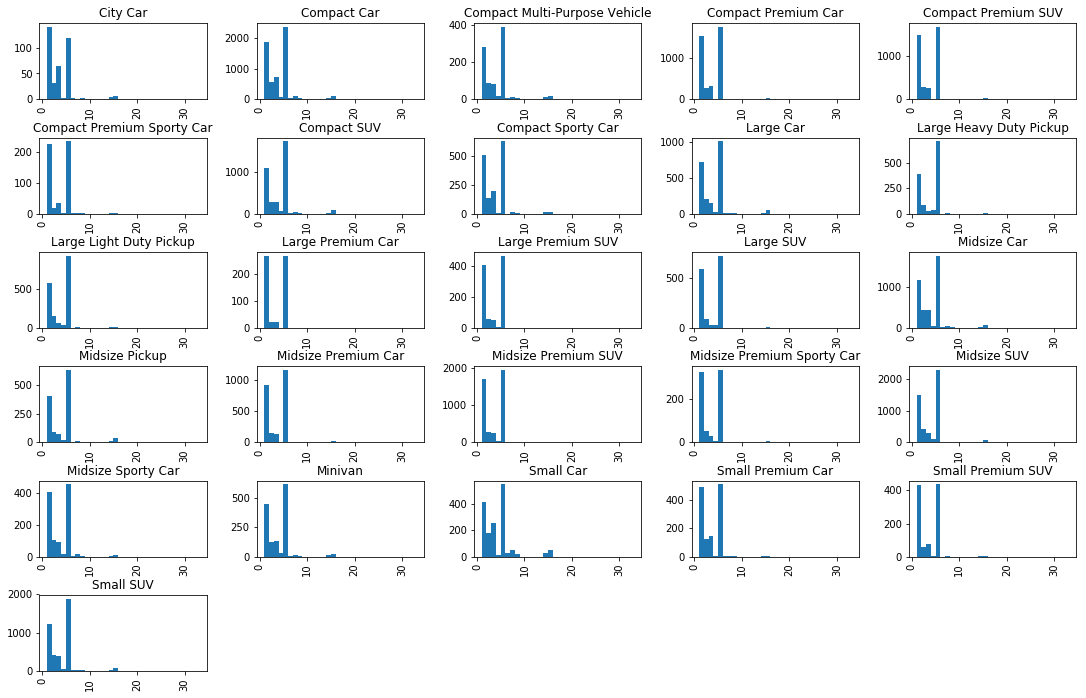

In [417]:
df[['Segment',var]].hist(by='Segment', bins=range(1,34), figsize=(18, 12))